---
# **PMA (C) - KELOMPOK 3**
1. Bayu Siddhi Mukti *(5026211021)*
2. Wanda Armadianti *(5026211039)*
3. Zahrina Candrakanti *(5026211100)*
4. Alif Destiano *(5026211176)*
---

# **TGP2**
---

## **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

pd.set_option("display.max_colwidth", None)

## **Data Loading**

In [ ]:
# Import data dari CSV menjadi data frame
df = pd.read_csv('Data utk TGP #1.csv', sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## **Univariate Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  subscribe  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### **Histogram**

<Figure size 1000x1000 with 0 Axes>

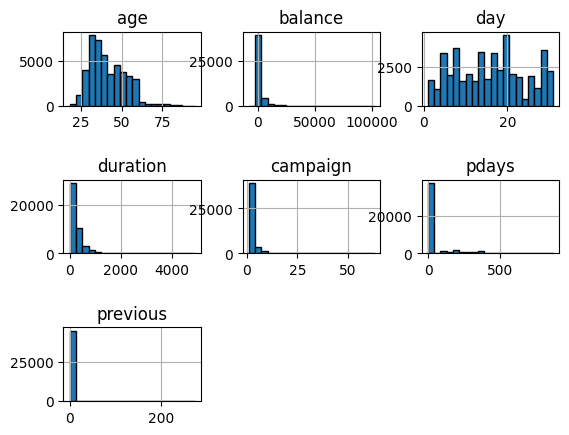

In [ ]:
# Menampilkan histogram seluruh variabel numerikal
plt.figure(figsize=(10, 10))
df.hist(bins=20, edgecolor='k')
plt.subplots_adjust(hspace=1)
plt.show()

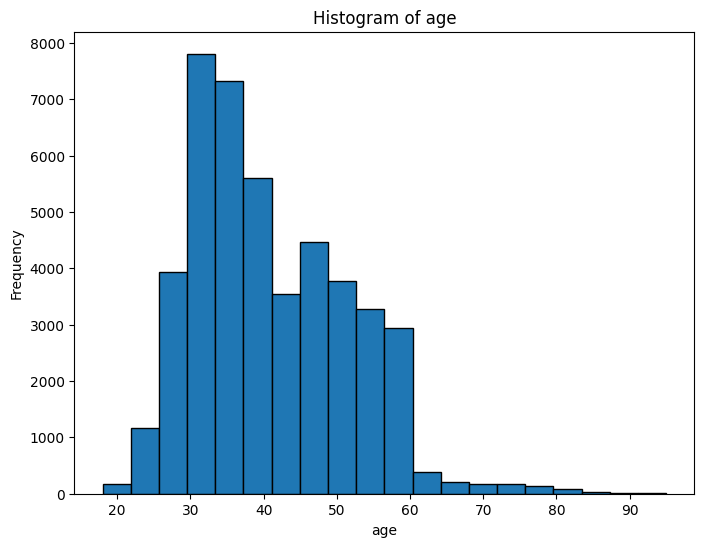

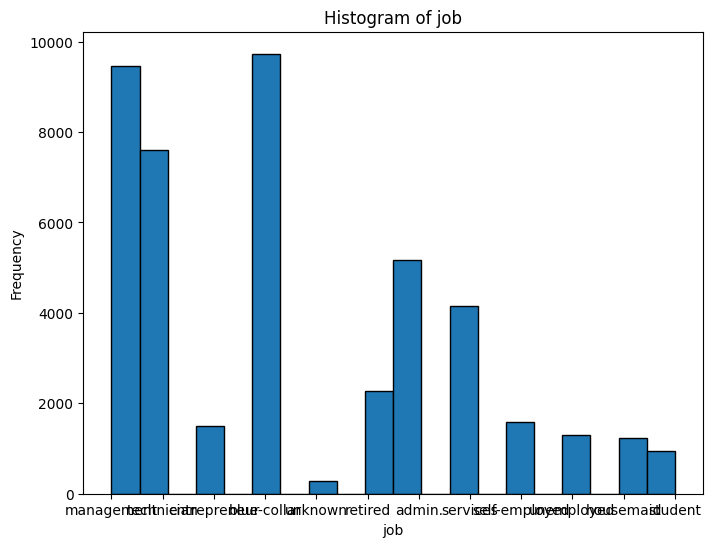

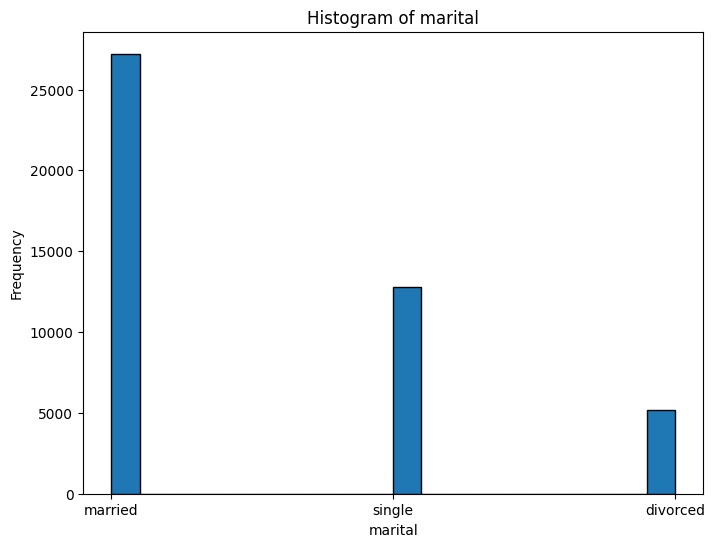

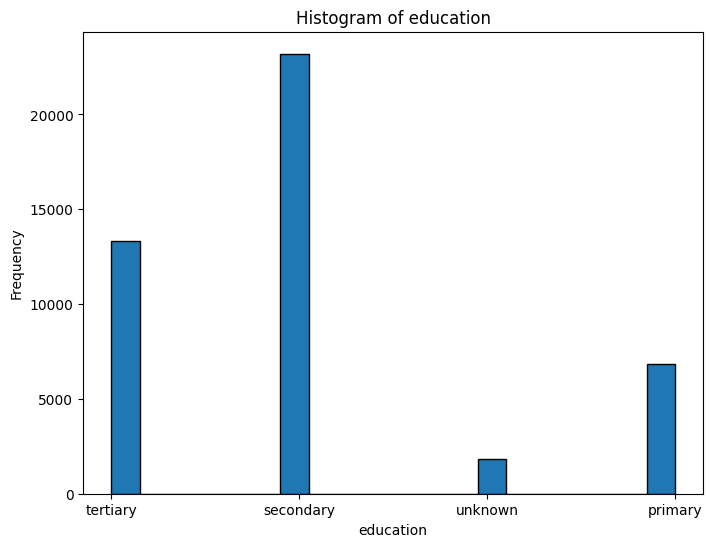

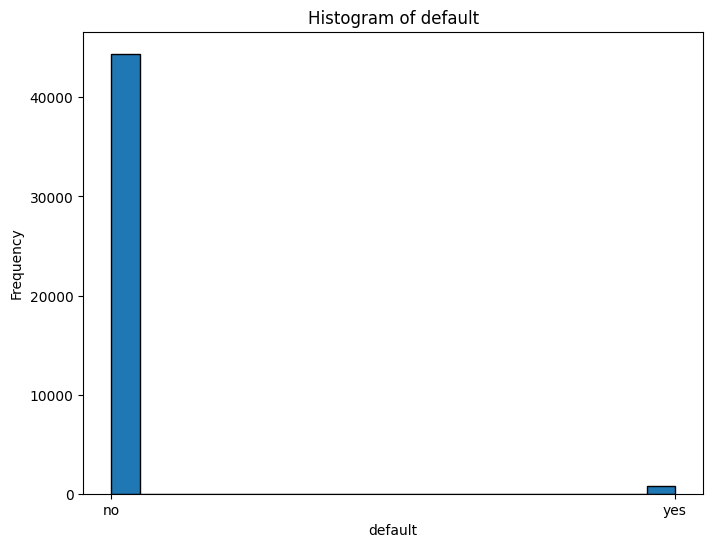

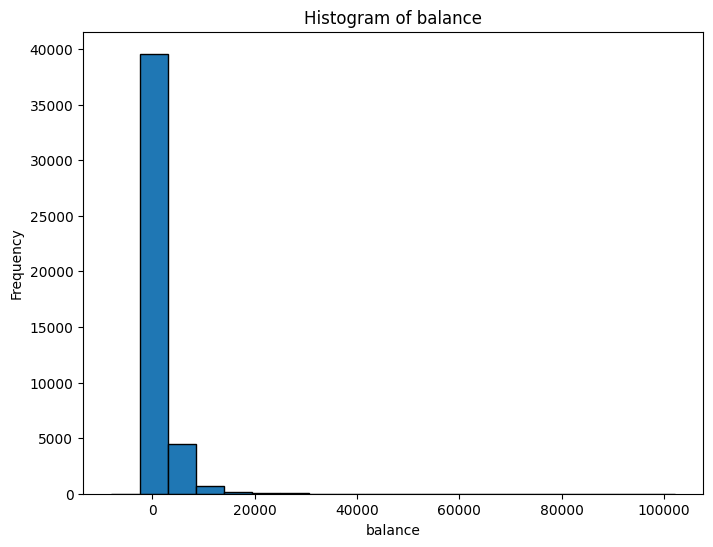

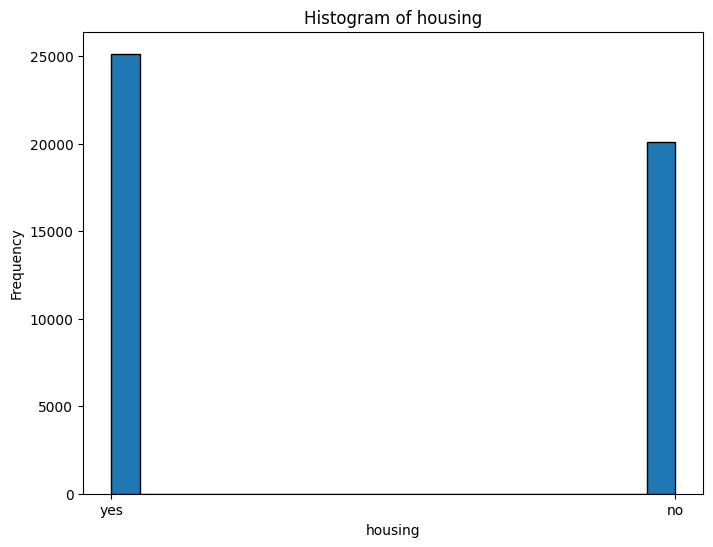

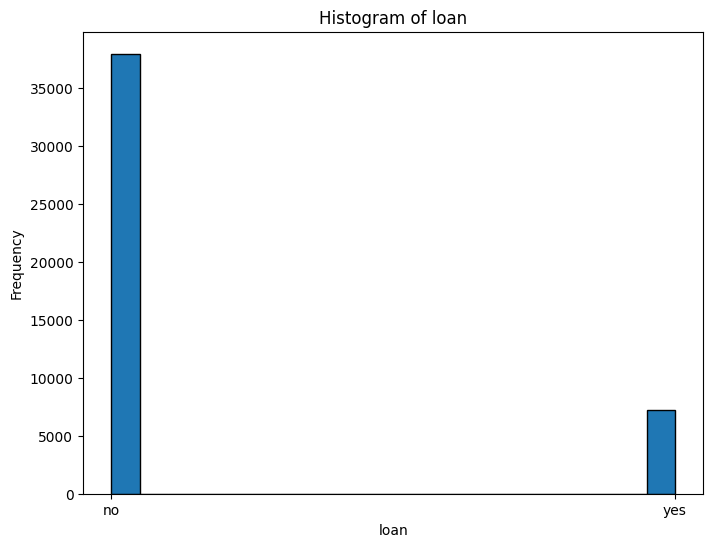

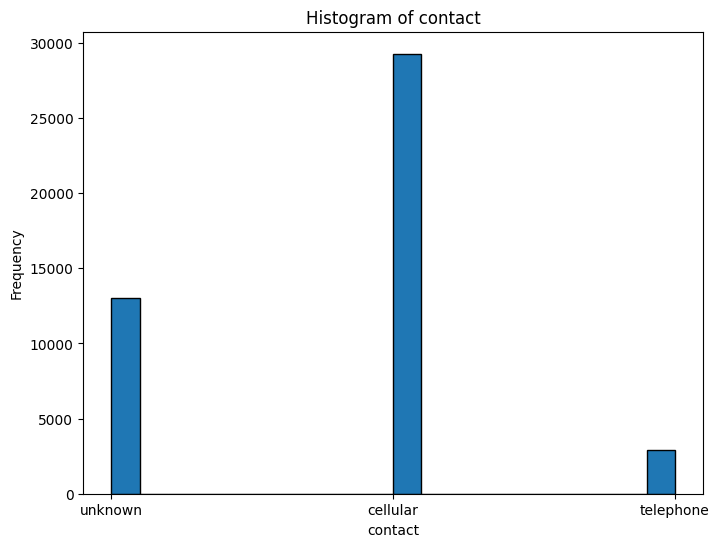

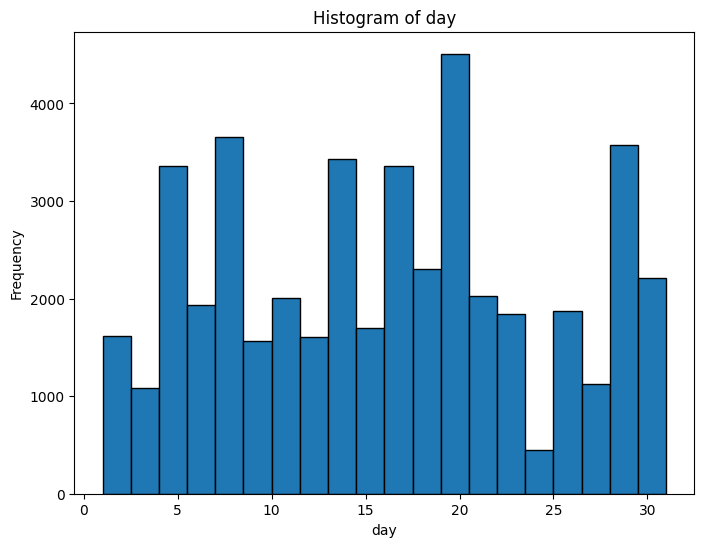

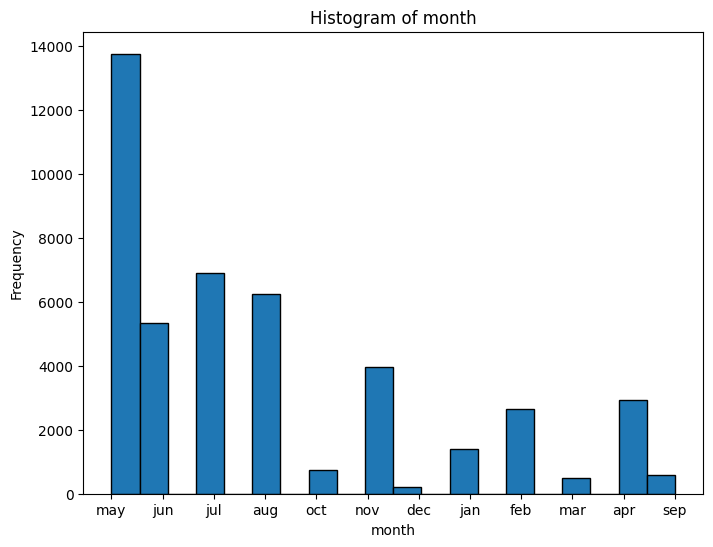

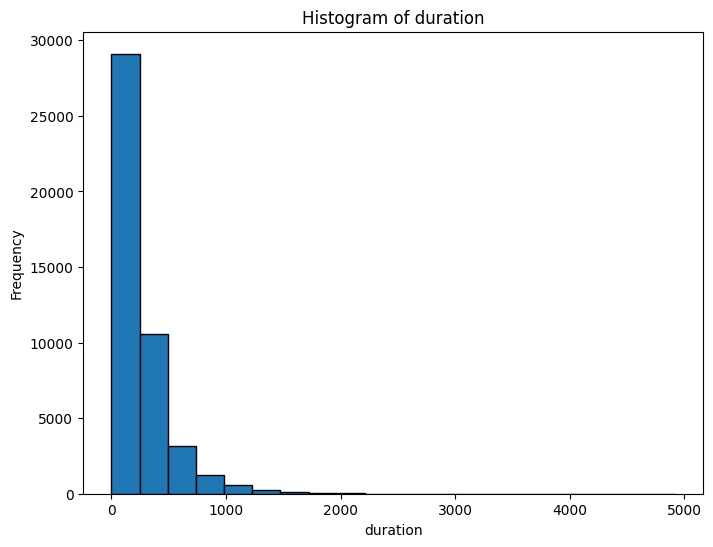

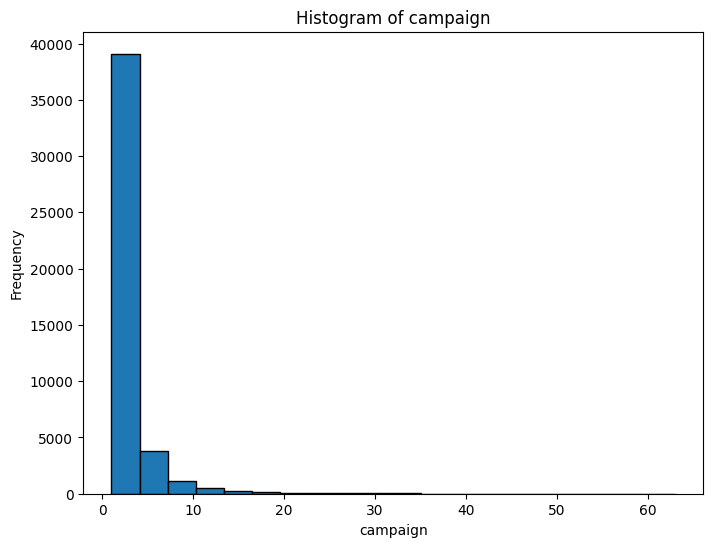

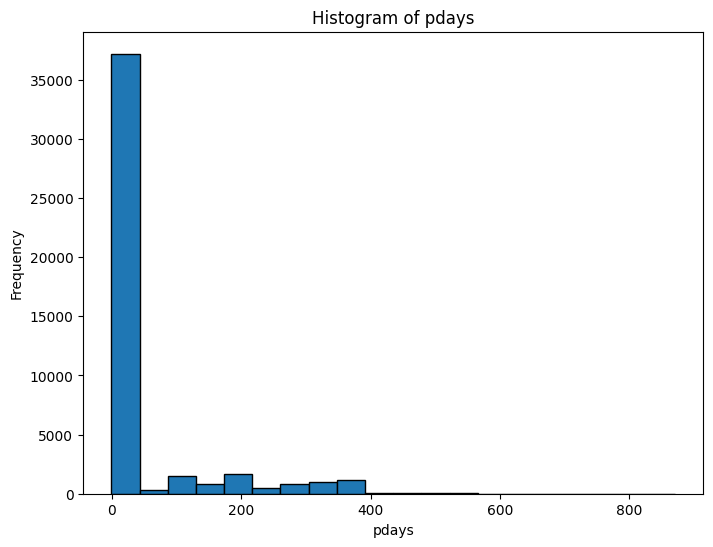

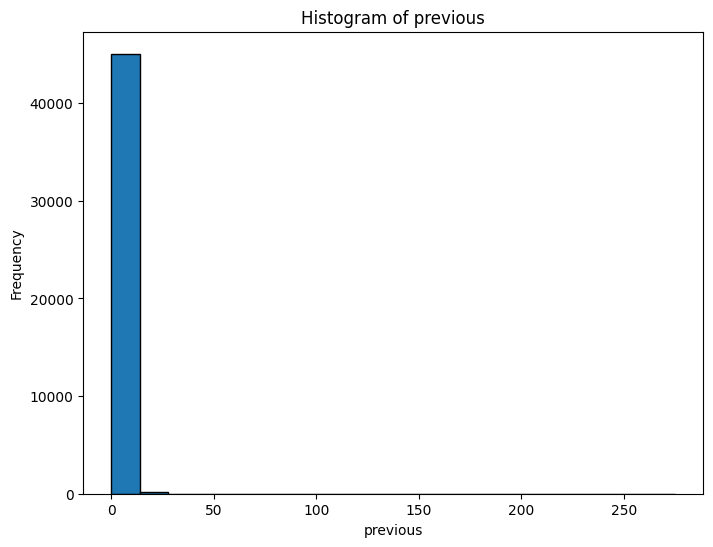

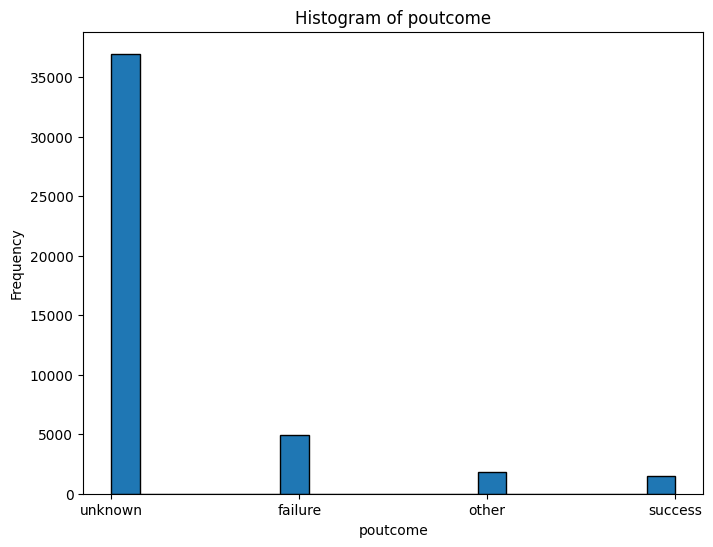

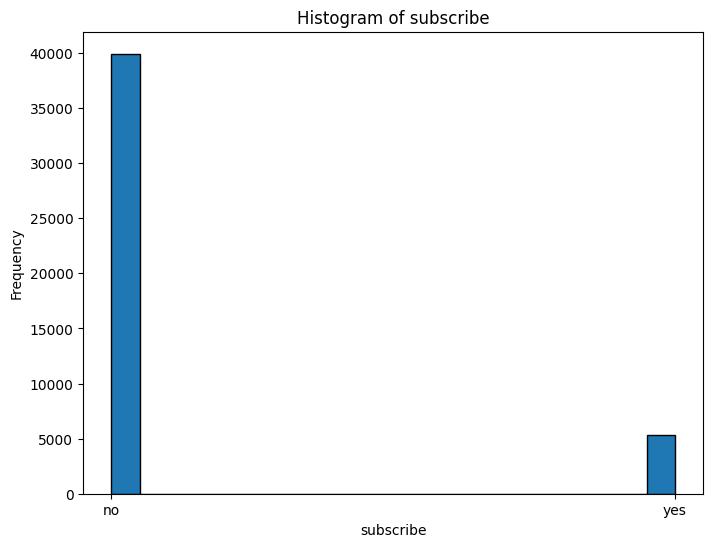

In [ ]:
# Menampilkan histogram seluruh variabel numerikal satu-persatu
for column in df.columns:
  print()
  plt.figure(figsize=(8, 6))
  plt.hist(df[column], bins=20, edgecolor='k')
  plt.title(f'Histogram of {column}')
  plt.ylabel('Frequency')
  plt.xlabel(column)
  plt.show()

### **Bar Chart**

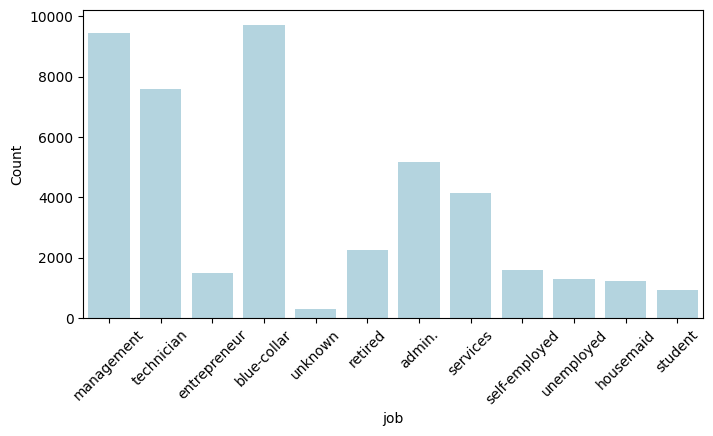

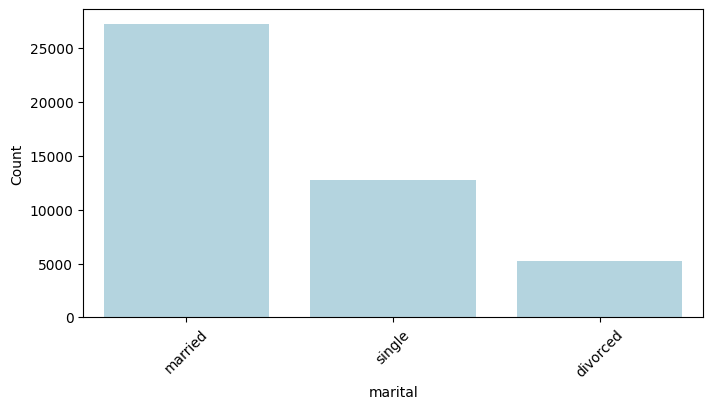

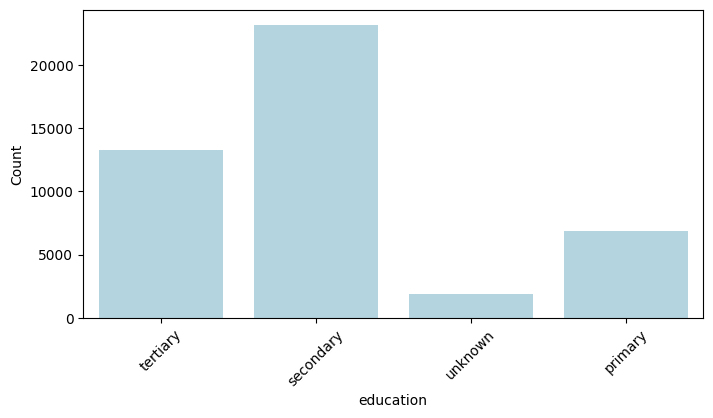

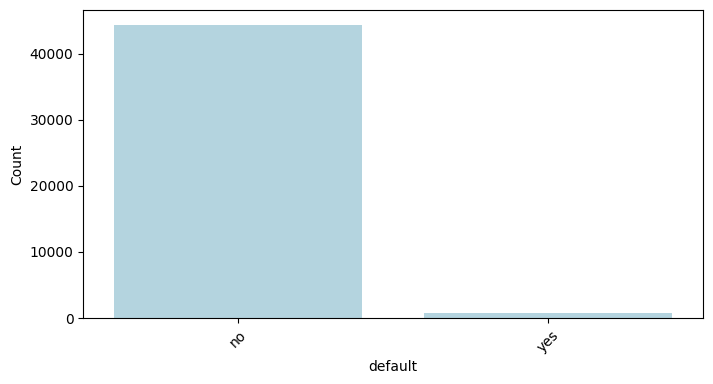

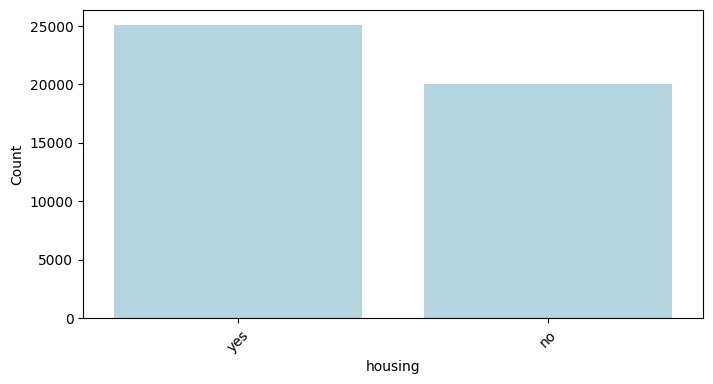

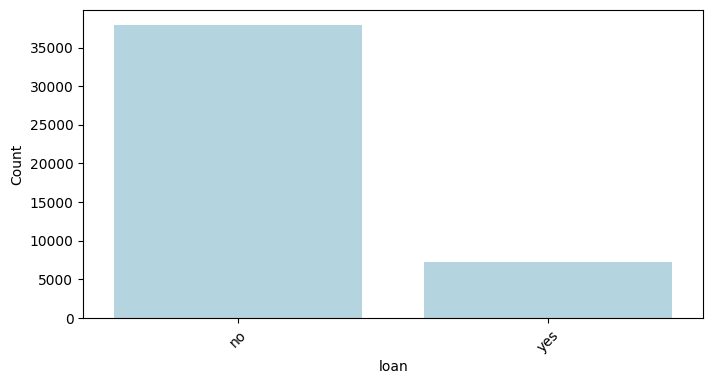

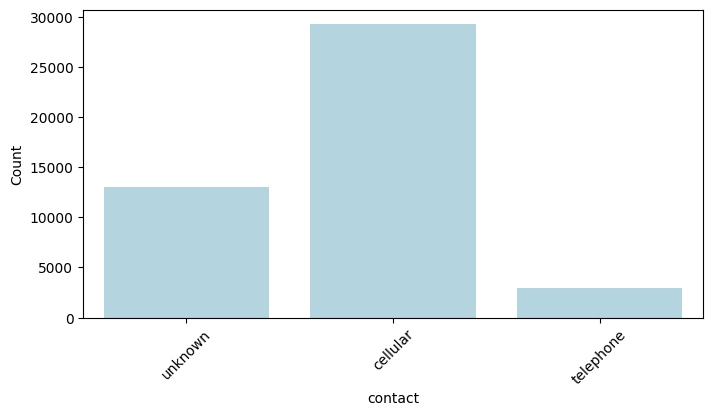

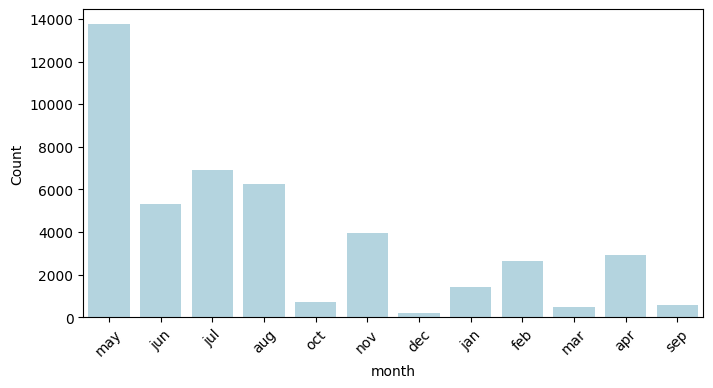

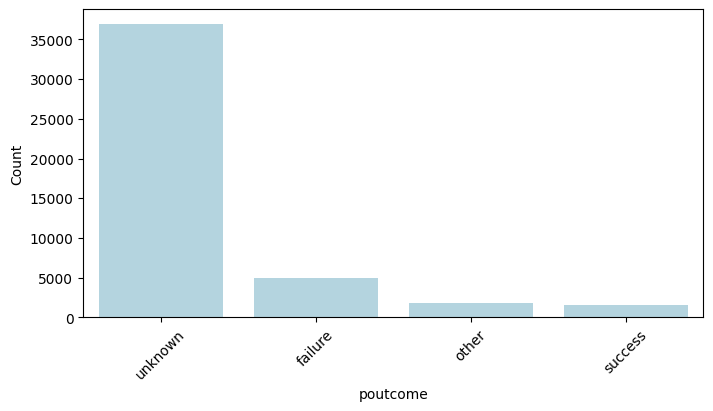

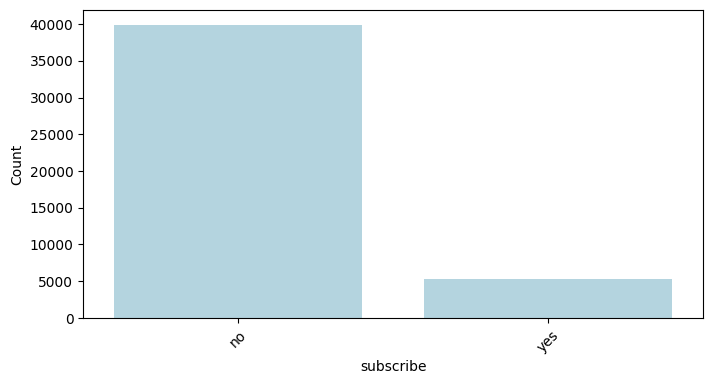

In [ ]:
for column in df.select_dtypes(include='object'):
  plt.figure(figsize=(8, 4))
  sns.countplot(x=df[column], data=df, color='lightblue')
  plt.xlabel(f"{column}")
  plt.ylabel('Count')
  plt.xticks(rotation=45)
  plt.show()

### **Box Plot**

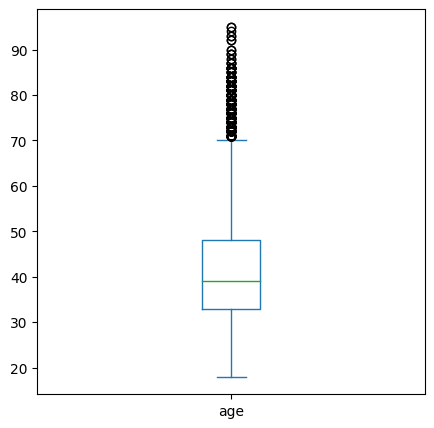

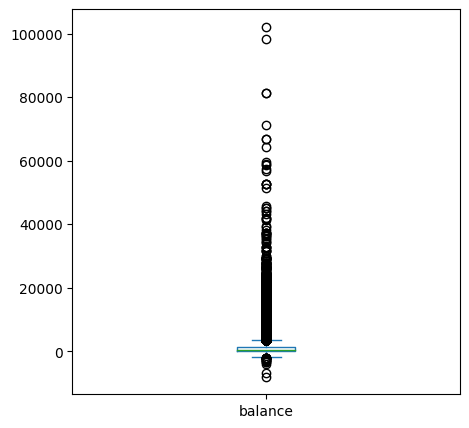

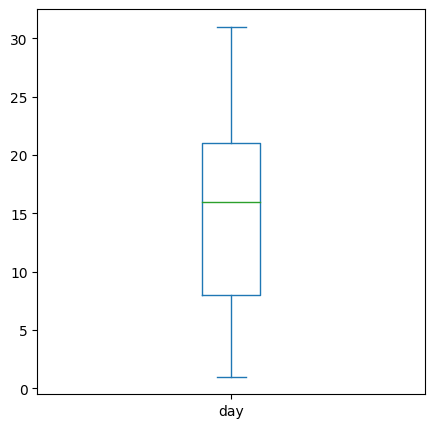

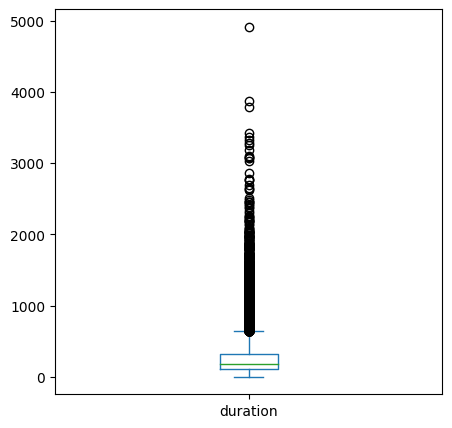

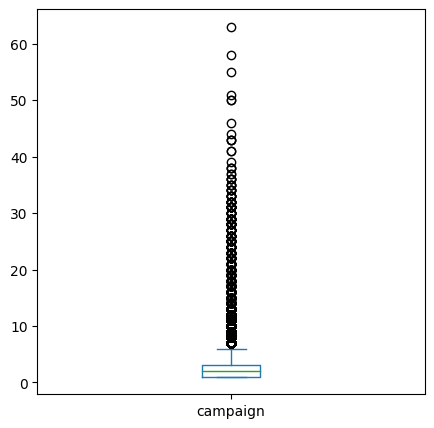

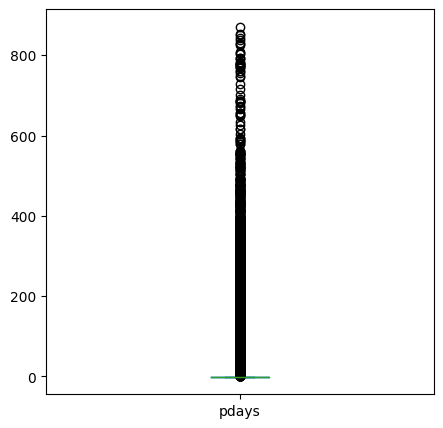

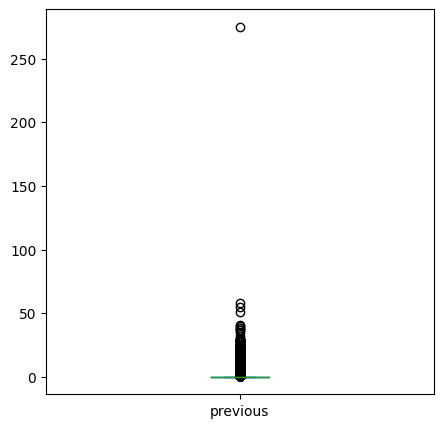

In [ ]:
for column in df.select_dtypes(include='number'):
  plt.figure(figsize = (5, 5))
  df[column].plot(kind='box')
  plt.show()

## **Bivariate Analysis**

### **Scatter Plot**

In [ ]:
# sns.pairplot(data=df, hue='subscribe')

### **Stacked Bar Chart**

In [ ]:
# Menyiapkan Stacked Bar Chart
one_hot = pd.get_dummies(df['subscribe'])
df_bivariate = df.join(one_hot)
df_bivariate = df_bivariate.drop(columns = 'subscribe')
df_bivariate = df_bivariate.rename(columns={'yes': 'subscribe', 'no': 'not_subscribe'})

In [ ]:
def stacked_bar_chart_to_subsribe(column, type = ''):
  total_subscribe = df_bivariate[df_bivariate['subscribe'] == 1].groupby(column)['subscribe'].count().to_frame()
  total_not_subscribe = df_bivariate[df_bivariate['not_subscribe'] == 1].groupby(column)['not_subscribe'].count().to_frame()
  subscribe_relationship = total_subscribe.join(total_not_subscribe)

  plt.figure(figsize=(10, 6))

  plt.bar(subscribe_relationship.index, subscribe_relationship['subscribe'],
          label='Subscribe', color='lightcoral')
  plt.bar(subscribe_relationship.index, subscribe_relationship['not_subscribe'],
          label='Not Subscribe', bottom=subscribe_relationship['subscribe'], color='skyblue')

  plt.xlabel(column.capitalize())
  plt.ylabel('Count')
  if type == 'rotate_label':
    plt.xticks(rotation=30)

  plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
  plt.tight_layout()
  plt.legend()
  plt.show()

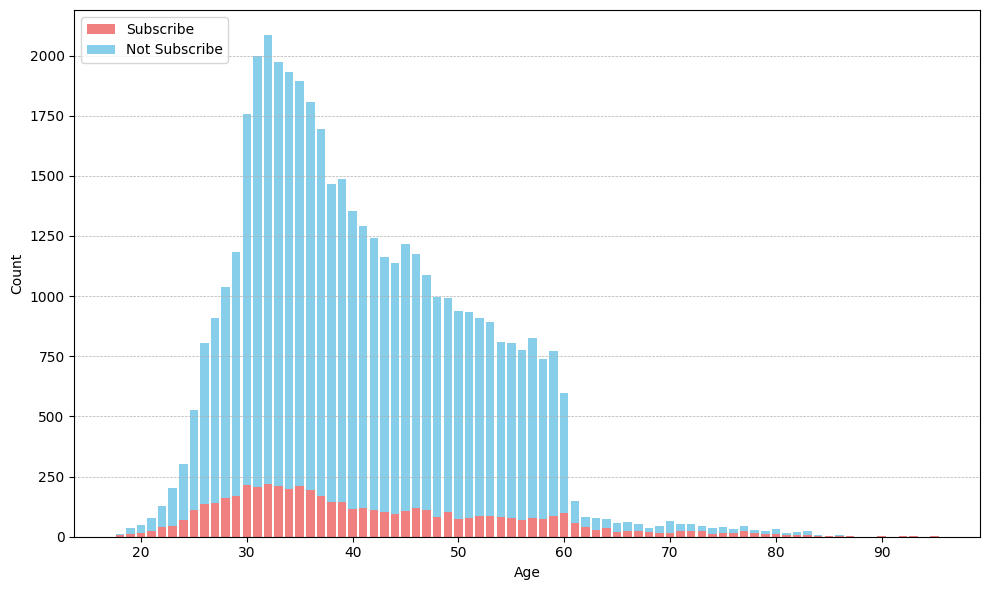

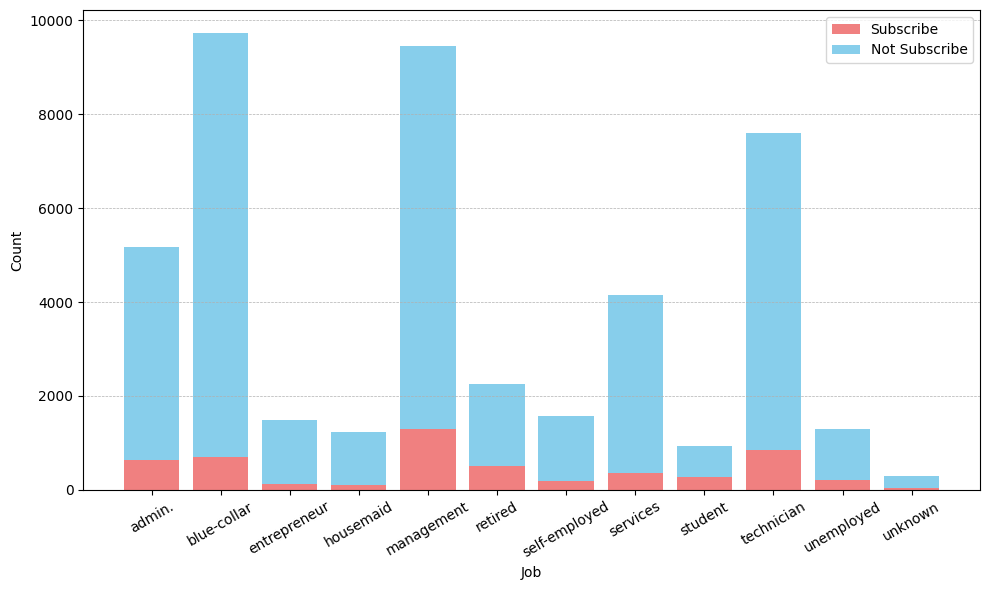

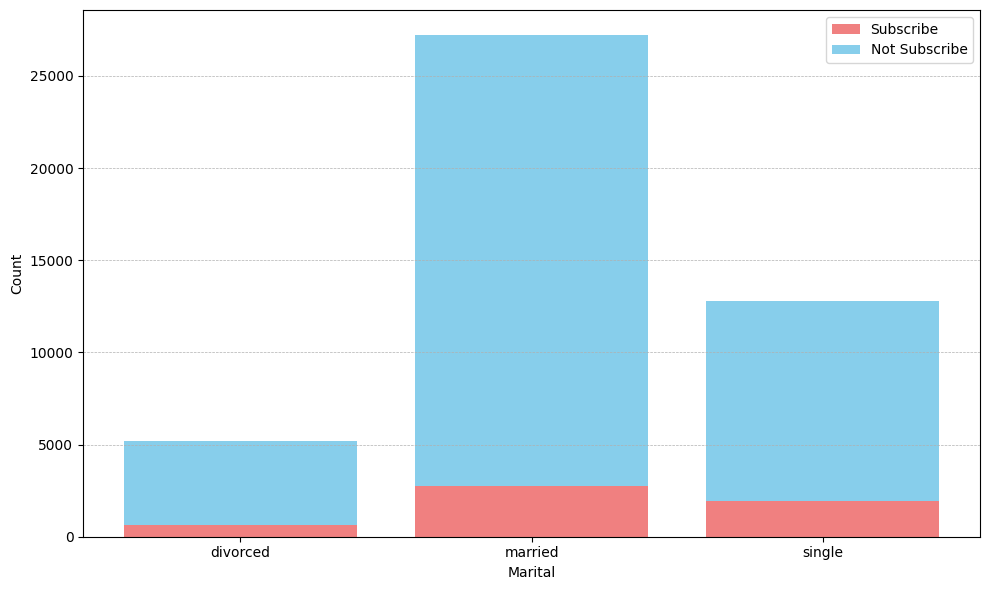

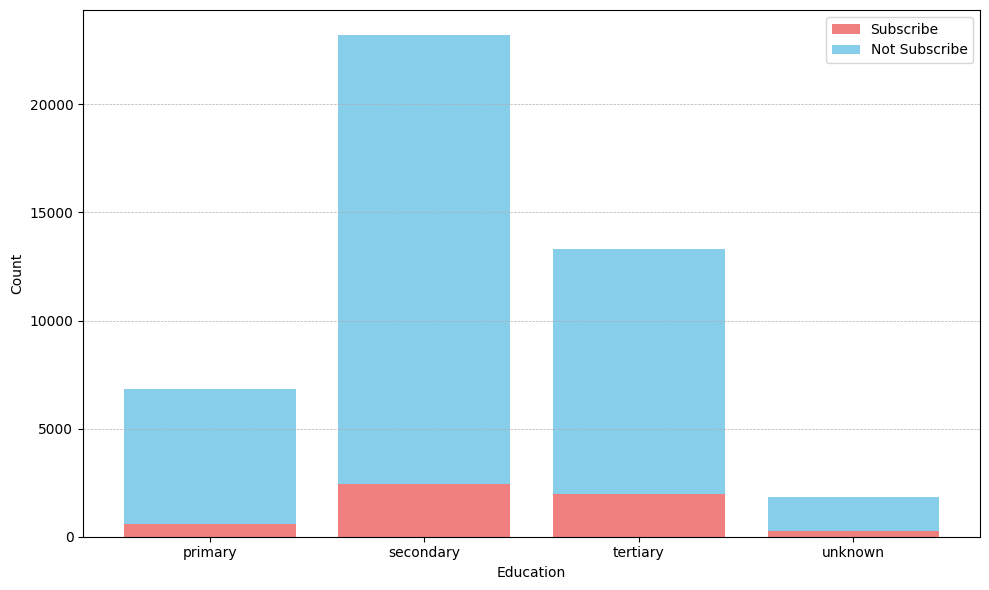

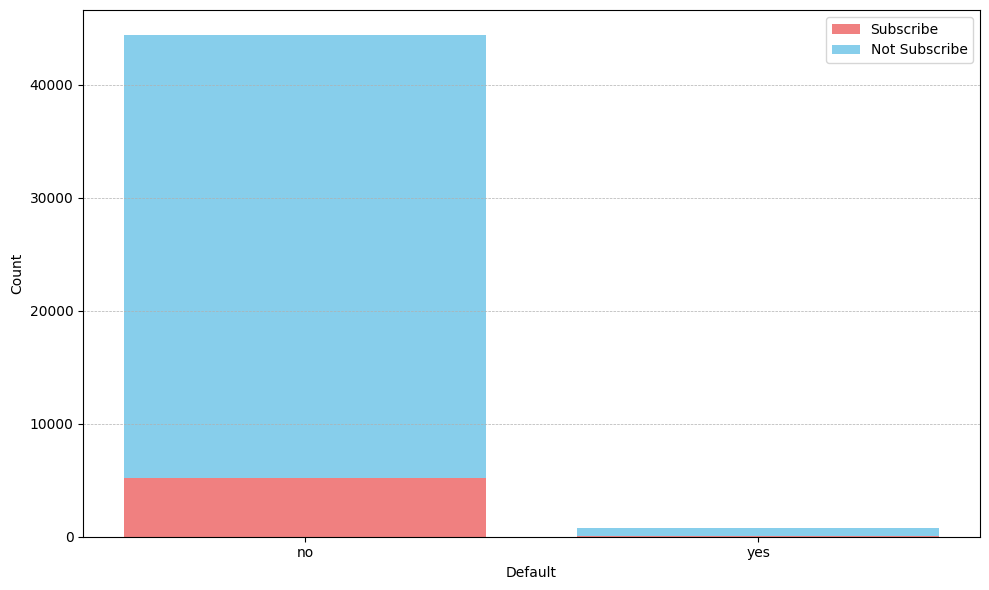

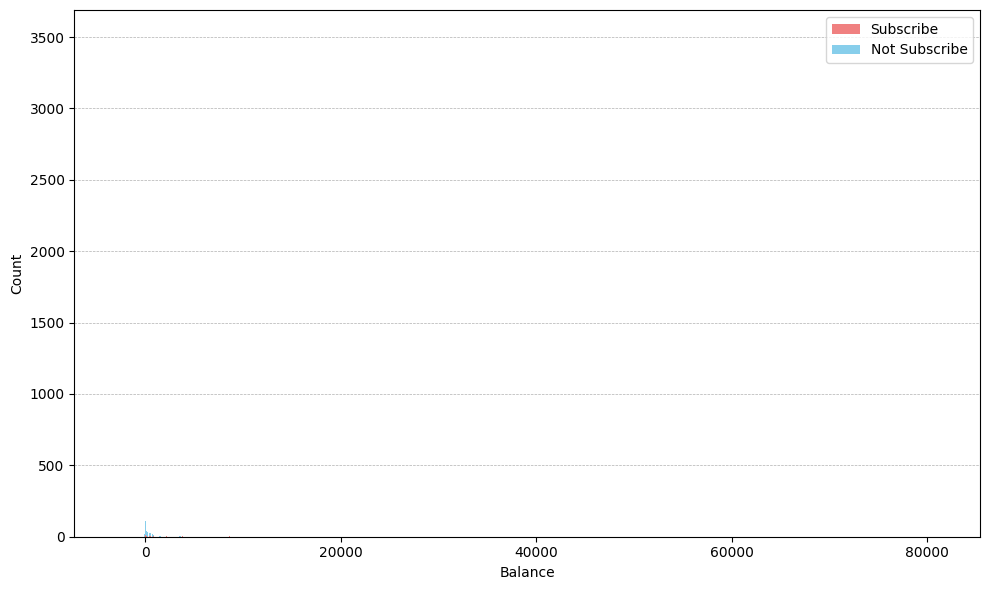

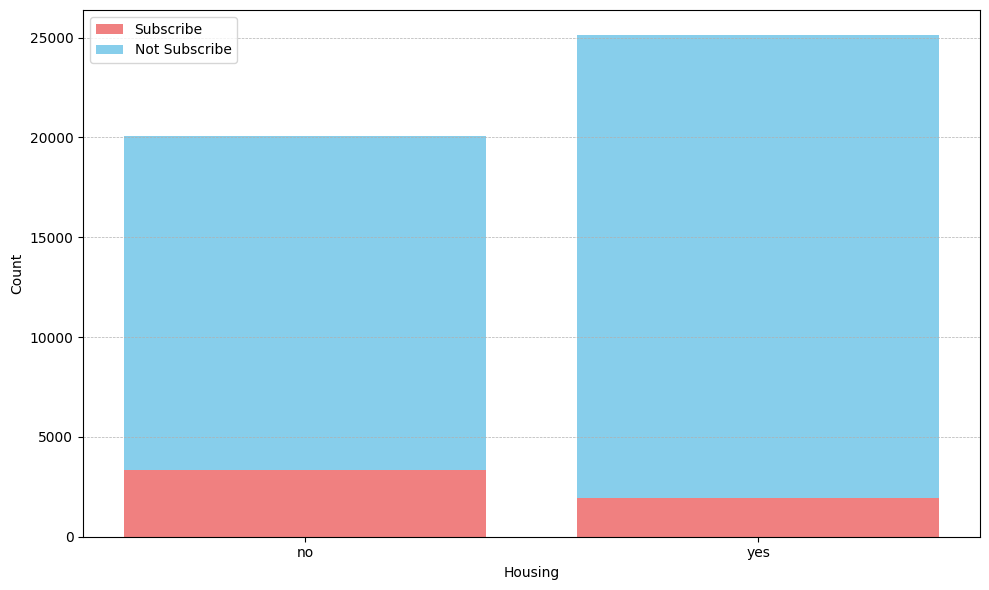

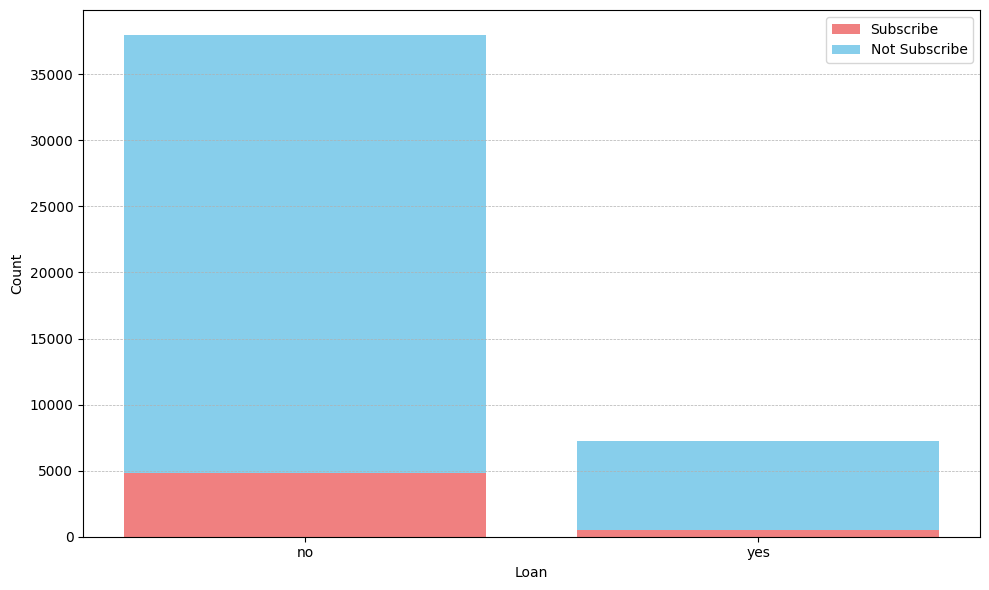

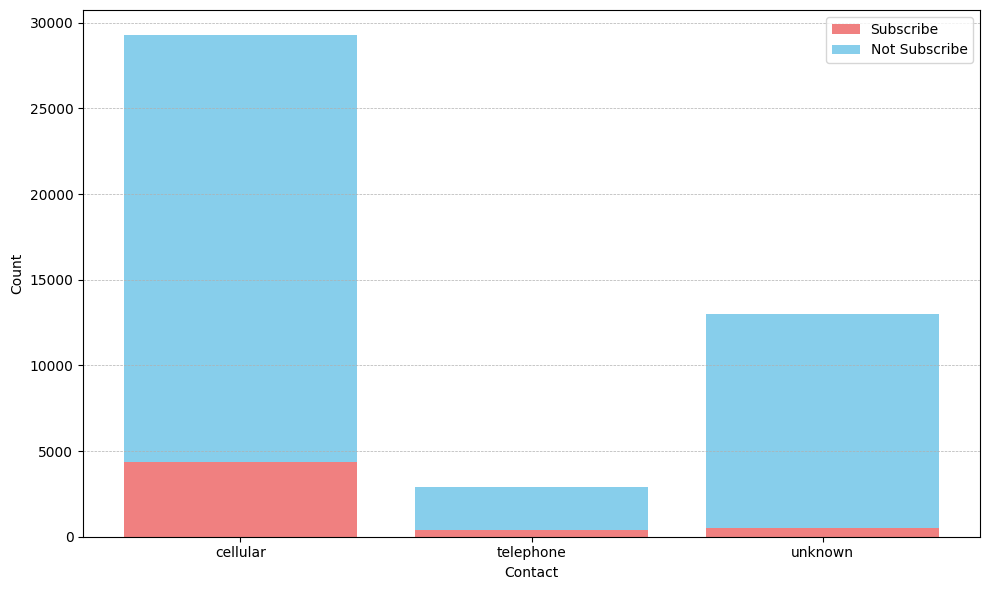

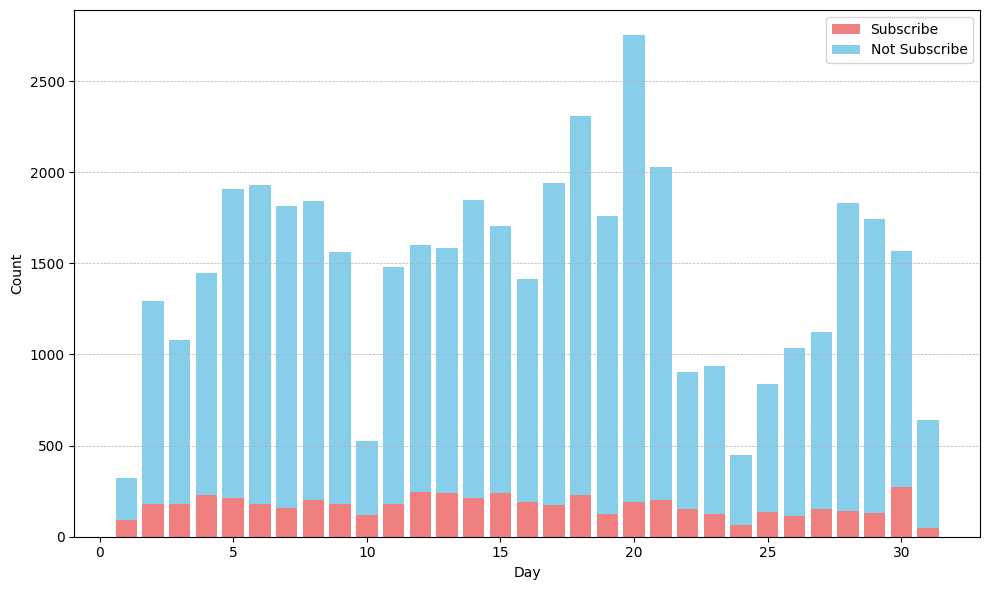

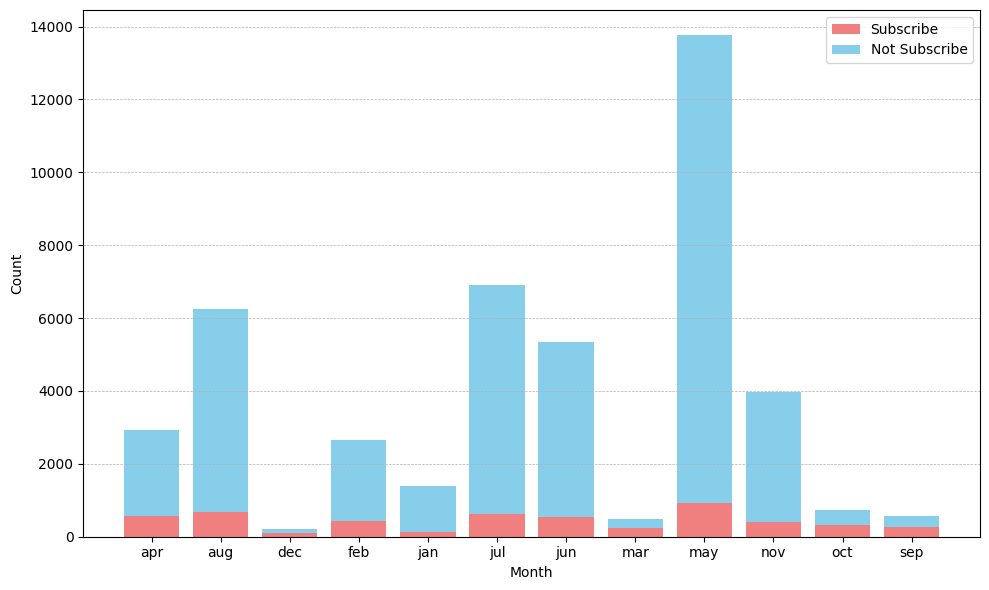

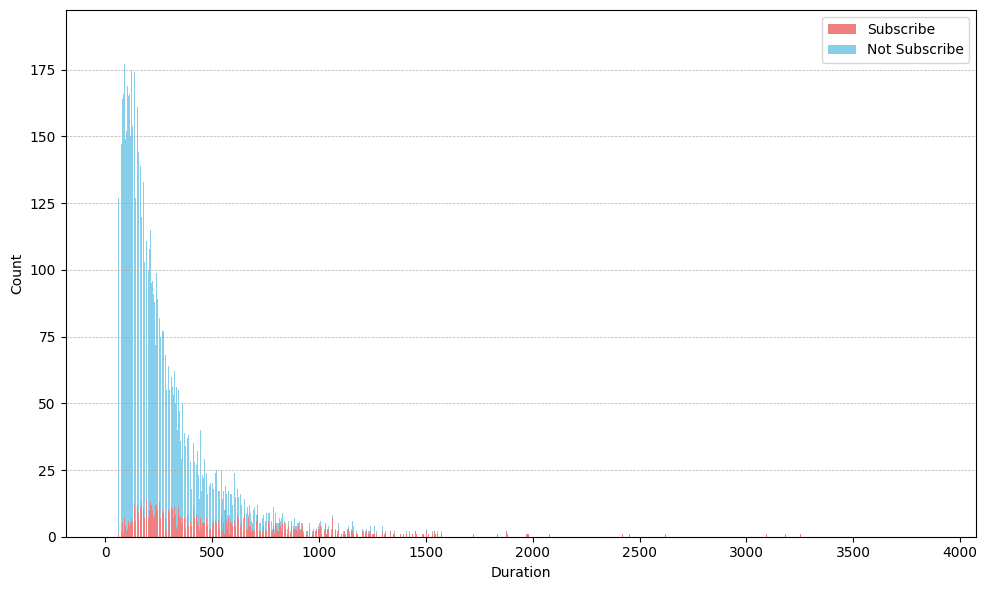

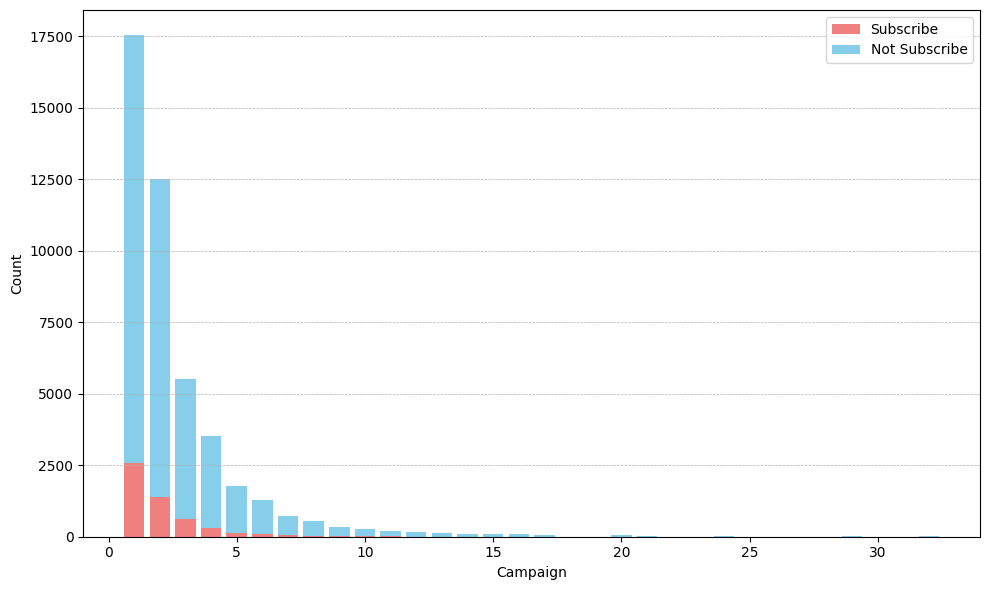

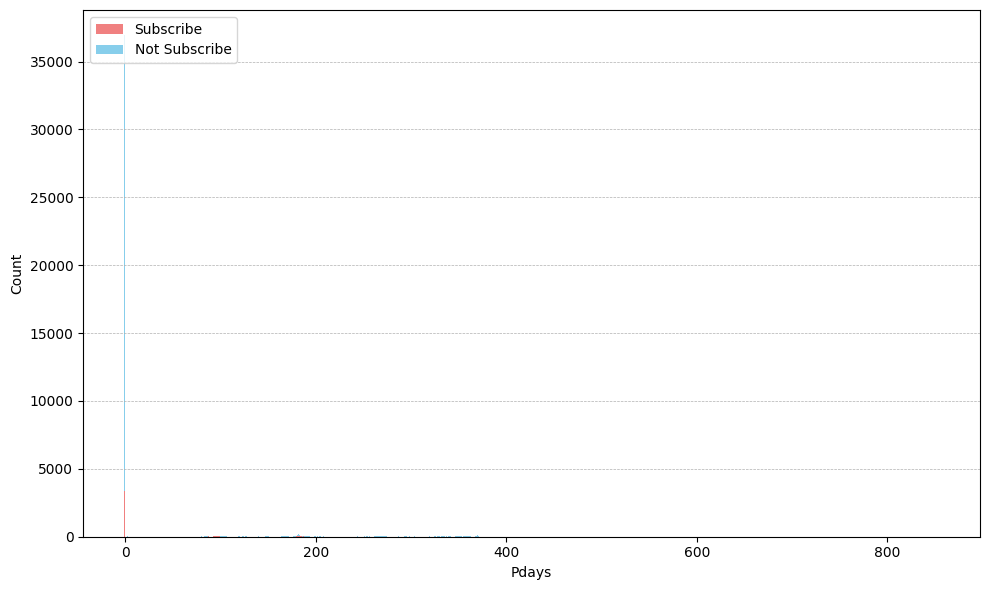

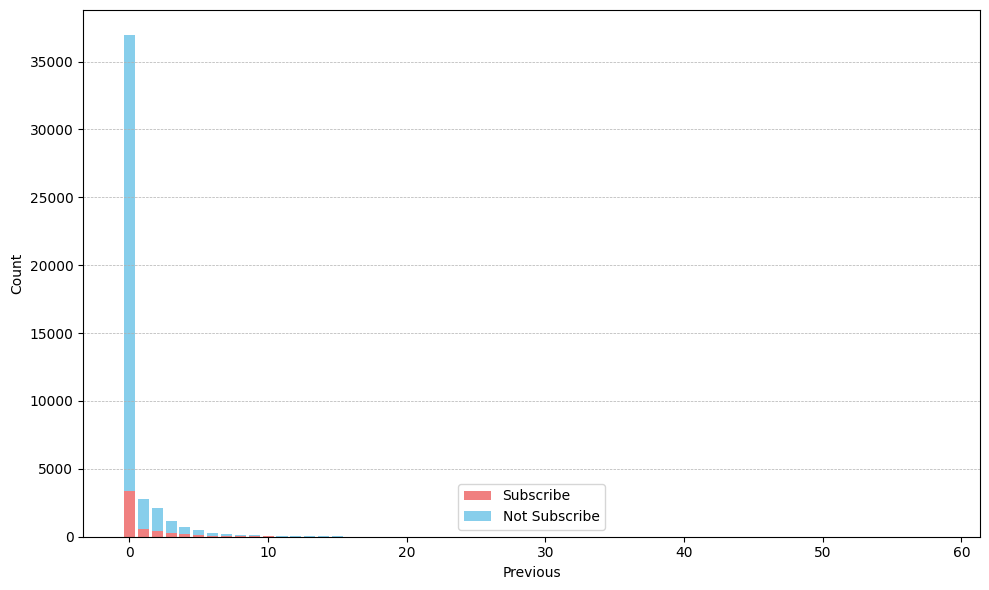

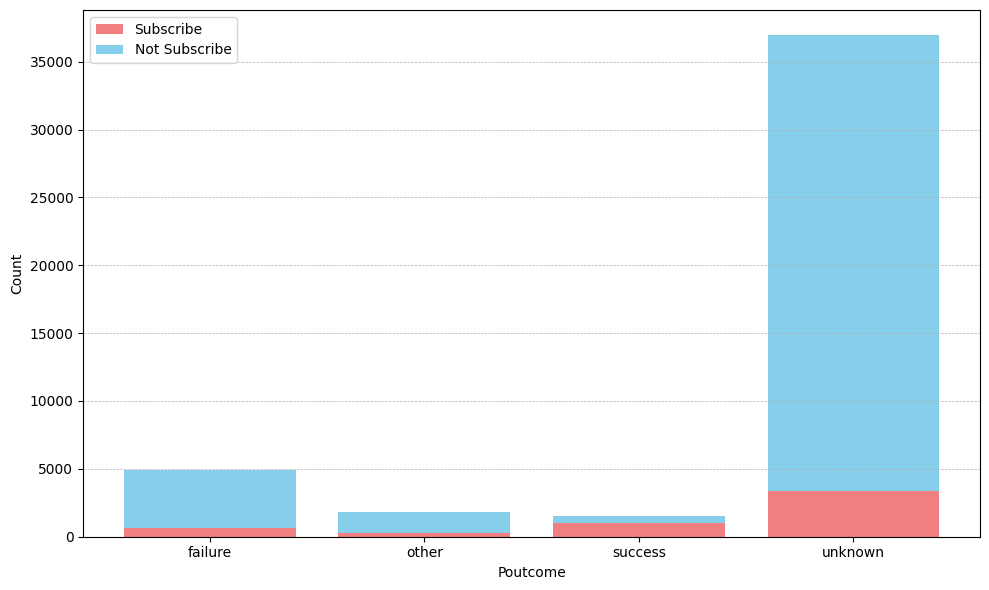

In [ ]:
for column in df.columns:
  if column not in ['subscribe', 'not_subscribe']:
    if column in ['job']:
      stacked_bar_chart_to_subsribe(column, 'rotate_label')
    else:
      stacked_bar_chart_to_subsribe(column)

### **Correlation**

Menghitung Korelasi Antar Atribut Independen Numeric

In [ ]:
# Menghitung matriks korelasi untuk semua kolom
correlation_matrix = df.corr()

# Menampilkan matriks korelasi
print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


<ipython-input-13-ec773dc51d50>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


## **Preprocessing**

### **Data Type Adjustment**

In [ ]:
# Cek tipe data variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  subscribe  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Mengubah tipe data dari kolom 'job', 'marital', 'education', 'contact', 'month', dan 'poutcome' dari object menjadi categorical
df['job'] = df['job'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['contact'] = df['contact'].astype('category')
df['month'] = df['month'].astype('category')
df['poutcome'] = df['poutcome'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  subscribe  45211 non-null  object  
dtypes: category(6), int64(7), object(4)
memory usage: 4.1+ MB


### **Check for Null Value**

In [ ]:
# Mengecek jumlah data null
jumlah_data_null = df.isnull().sum()
print(f"Jumlah data null di tiap kolom: \n{jumlah_data_null}")

Jumlah data null di tiap kolom: 
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
subscribe    0
dtype: int64


### **Check for Unique Value**

In [ ]:
# Function untuk melihat nilai unique value dari variabel categorical
def unique_value(column):
  data = []
  for value in df[column].unique():
    data.append(value)
  print(f"Nilai dari variabel {column} = {data}")

In [ ]:
# Menampilkan semua unique value dari semua variabel categorical
for column in df.select_dtypes(include='category').columns:
  unique_value(column)

Nilai dari variabel job = ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Nilai dari variabel marital = ['married', 'single', 'divorced']
Nilai dari variabel education = ['tertiary', 'secondary', 'unknown', 'primary']
Nilai dari variabel contact = ['unknown', 'cellular', 'telephone']
Nilai dari variabel month = ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
Nilai dari variabel poutcome = ['unknown', 'failure', 'other', 'success']


### **Check for Unknown Value**

In [ ]:
# Function untuk menghitung jumlah data 'unknown' di setiap variabel categorical
def check_unknown_value():
  length = 0
  for column in df.columns:
    if length < len(column):
      length = len(column)

  print('Total data unknown di setiap variabel categorical:')

  # Menghitung jumlah data 'unknown' di setiap variabel categorical
  for column in df.select_dtypes(include='category').columns:
    unknown = (df[column] == 'unknown').sum()
    total = len(df)
    ratio = unknown/total

    text_column = column
    if len(column) < length:
      for i in range(0, (length - len(column))):
        text_column = text_column + ' '

    text_ratio = f"{unknown}/{total}"
    text_ratio_max = f"{len(df)}/{len(df)}"
    if len(text_ratio) < len(text_ratio_max):
      for i in range(0, (len(text_ratio_max) - len(text_ratio))):
        text_ratio = text_ratio + ' '

    print(f"{text_column}\t = {text_ratio}\t = {ratio}")

In [ ]:
check_unknown_value()

Total data unknown di setiap variabel categorical:
job      	 = 288/45211  	 = 0.006370131162770122
marital  	 = 0/45211    	 = 0.0
education	 = 1857/45211 	 = 0.04107407489327818
contact  	 = 13020/45211	 = 0.28798301298356593
month    	 = 0/45211    	 = 0.0
poutcome 	 = 36959/45211	 = 0.8174780473778506


Variabel 'job' dan 'education' memiliki jumlah data unknown yang sedikit (0,6% dan 4%).

Variabel 'contact' dan 'poutcome' memiliki jumlah data unknown yang banyak (28% dan 81%)

### **Dealing with Unknown Value**

Karena variabel 'job' dan 'education' memiliki jumlah unknown value yang sedikit maka unknown value tersebut dapat digantikan dengan menggunakan mode-nya (karena keduanya adalah variabel categorical)

In [ ]:
# Function untuk mengganti unknown value menjadi data mode-nya
def replace_unknown_to_mode(column):
  mode = df[column].value_counts().idxmax()
  df[column] = df[column].replace(to_replace = 'unknown', value = mode)

In [ ]:
# Menangani unknown value pada variabel 'job' dan 'education' (ganti value dengan mode-nya)
replace_unknown_to_mode('job')
replace_unknown_to_mode('education')
check_unknown_value()

Total data unknown di setiap variabel categorical:
job      	 = 0/45211    	 = 0.0
marital  	 = 0/45211    	 = 0.0
education	 = 0/45211    	 = 0.0
contact  	 = 13020/45211	 = 0.28798301298356593
month    	 = 0/45211    	 = 0.0
poutcome 	 = 36959/45211	 = 0.8174780473778506


Menangani nilai unknown pada variabel 'contact' dengan cara menghapus semua baris yang mengandung nilai unknown

In [ ]:
df['contact'] = df['contact'].replace('unknown', np.nan)
df = df.dropna()
df = df.reset_index(drop=True)
check_unknown_value()

Total data unknown di setiap variabel categorical:
job      	 = 0/32191    	 = 0.0
marital  	 = 0/32191    	 = 0.0
education	 = 0/32191    	 = 0.0
contact  	 = 0/32191    	 = 0.0
month    	 = 0/32191    	 = 0.0
poutcome 	 = 24009/32191	 = 0.7458295796961883


Karena variabel 'poutcome' memiliki jumlah unknown value yang sangat banyak maka seharusnya variabel 'poutcome' dapat dihapus. Namun, agar jumlah variabel tidak mengalami perubahan maka 'poutcome' tetap dipertahankan.

### **Check for Duplicate Value**

In [ ]:
# Mencari jumlah baris yang nilai nya sama persis (duplikat)
jumlah_baris_duplikat = df.duplicated().sum()
print(f"Jumlah baris data duplikat = {jumlah_baris_duplikat}")

Jumlah baris data duplikat = 0


### **Dealing with Outliers**

Berdasarkan hasil univariate analysis, diketahui terdapat outlier pada beberapa variabel numerikal. Untuk mengatasinya dapat dilakukan dengan menghapus outlier menggunakan metode Z-Score

In [ ]:
# Menghapus outlier menggunakan Z-score dengan Threshold 3
def remove_outliers_zscore_loop(df, threshold=3):
    outliers = []
    for col in df.select_dtypes(include='number').columns:
        z_scores = np.abs((df[col] - df[col].mean()) /df[col].std())
        outliers.append(z_scores <= threshold)
    outliers = np.all(outliers, axis=0)
    TGP1_no_outliers = df[outliers]
    return TGP1_no_outliers

df_cleaned = remove_outliers_zscore_loop(df)

In [ ]:
df_cleaned

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,unknown,no
1,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,unknown,no
2,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,unknown,no
3,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,unknown,no
4,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32184,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
32185,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
32186,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
32187,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


Setelah outlier dihapus, jumlah data pada dataset berubah menjadi 29453

### **Label Encoding**

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29453 entries, 0 to 32189
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        29453 non-null  int64   
 1   job        29453 non-null  category
 2   marital    29453 non-null  category
 3   education  29453 non-null  category
 4   default    29453 non-null  object  
 5   balance    29453 non-null  int64   
 6   housing    29453 non-null  object  
 7   loan       29453 non-null  object  
 8   contact    29453 non-null  category
 9   day        29453 non-null  int64   
 10  month      29453 non-null  category
 11  duration   29453 non-null  int64   
 12  campaign   29453 non-null  int64   
 13  pdays      29453 non-null  int64   
 14  previous   29453 non-null  int64   
 15  poutcome   29453 non-null  category
 16  subscribe  29453 non-null  object  
dtypes: category(6), int64(7), object(4)
memory usage: 2.9+ MB


In [ ]:
# Melakukan encoding terhadap variabel binary
df_encoded = df_cleaned.replace({'default' : {'no': 0, 'yes': 1}})
df_encoded = df_encoded.replace({'housing' : {'no': 0, 'yes': 1}})
df_encoded = df_encoded.replace({'loan' : {'no': 0, 'yes': 1}})
df_encoded = df_encoded.replace({'subscribe' : {'no': 0, 'yes': 1}})

In [ ]:
# Melakukan encoding terhadap variabel categorical ordinal
df_encoded = df_encoded.replace({'education' : {'unknown': 1, 'primary': 2, 'secondary': 3, 'tertiary': 4}})
df_encoded = df_encoded.replace(
    {'month' : {
        'jan': 1, 'feb': 2, 'mar': 3,
        'apr': 4, 'may': 5, 'jun': 6,
        'jul': 7, 'aug': 8, 'sep': 9,
        'oct': 10, 'nov': 11,'dec': 12}})

df_encoded['education'] = df_encoded['education'].astype('int64')
df_encoded['month'] = df_encoded['month'].astype('int64')

In [ ]:
# Melakukan encoding terhadap variabel categorical nominal
df_encoded['job'] = df_encoded['job'].cat.codes
df_encoded['marital'] = df_encoded['marital'].cat.codes
df_encoded['contact'] = df_encoded['contact'].cat.codes
df_encoded['poutcome'] = df_encoded['poutcome'].cat.codes

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29453 entries, 0 to 32189
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        29453 non-null  int64
 1   job        29453 non-null  int8 
 2   marital    29453 non-null  int8 
 3   education  29453 non-null  int64
 4   default    29453 non-null  int64
 5   balance    29453 non-null  int64
 6   housing    29453 non-null  int64
 7   loan       29453 non-null  int64
 8   contact    29453 non-null  int8 
 9   day        29453 non-null  int64
 10  month      29453 non-null  int64
 11  duration   29453 non-null  int64
 12  campaign   29453 non-null  int64
 13  pdays      29453 non-null  int64
 14  previous   29453 non-null  int64
 15  poutcome   29453 non-null  int8 
 16  subscribe  29453 non-null  int64
dtypes: int64(13), int8(4)
memory usage: 3.3 MB


In [ ]:
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,27,4,2,3,0,35,0,0,0,4,7,255,1,-1,0,3,0
1,54,1,1,2,0,466,0,0,0,4,7,297,1,-1,0,3,0
2,43,1,1,3,0,105,0,1,0,4,7,668,2,-1,0,3,0
3,31,9,2,3,0,19,0,0,1,4,7,65,2,-1,0,3,0
4,27,9,2,3,0,126,1,1,0,4,7,436,4,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32184,73,5,1,3,0,2850,0,0,0,17,11,300,1,40,8,0,1
32185,25,9,2,3,0,505,0,1,0,17,11,386,2,-1,0,3,1
32186,51,9,1,4,0,825,0,0,0,17,11,977,3,-1,0,3,1
32187,71,5,0,2,0,1729,0,0,0,17,11,456,2,-1,0,3,1


## **Data Balancing**


In [ ]:
# Mengecek keseimbangan setiap value label tujuan
df_encoded['subscribe'].value_counts()

0    25562
1     3891
Name: subscribe, dtype: int64

In [ ]:
# Memisahkan Feature dan Label
X = df_encoded.drop('subscribe', axis=1)  # X = Feature
y = df_encoded['subscribe']               # y = Label

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [ ]:
# Menyeimbangkan value label tujuan
balancer = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balancer.fit_resample(X, y)
y_balanced.value_counts()

0    25562
1    25562
Name: subscribe, dtype: int64

## **Data Splitting**

In [ ]:
# Melakukan splitting pada data X_balanced dan y_balanced
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)

## **Feature Scaling**

In [ ]:
X_balanced.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000
mean,40.786773,4.558231,1.214576,3.247183,0.013066,1287.652746,0.419020,0.130604,0.076579,15.451354,6.317581,315.030455,2.241315,58.025174,0.799703,2.363880
std,11.441988,3.203159,0.625284,0.645377,0.113560,1870.495440,0.493404,0.336970,0.265924,8.375688,2.817964,232.590752,1.715021,104.358954,1.548346,1.080596
min,18.000000,0.000000,0.000000,2.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,8.000000,4.000000,139.000000,1.000000,-1.000000,0.000000,2.000000
50%,38.000000,4.000000,1.000000,3.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,7.000000,244.000000,2.000000,-1.000000,0.000000,3.000000
75%,49.000000,7.000000,2.000000,4.000000,0.000000,1711.000000,1.000000,0.000000,0.000000,21.000000,8.000000,432.000000,3.000000,92.000000,1.000000,3.000000
max,74.000000,10.000000,2.000000,4.000000,1.000000,10995.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1031.000000,11.000000,392.000000,8.000000,3.000000


In [ ]:
scaler = StandardScaler()

X_train['age'] = scaler.fit_transform(X_train[['age']])
X_test['age'] = scaler.transform(X_test[['age']])

scaler = MinMaxScaler()

X_train['balance'] = scaler.fit_transform(X_train[['balance']])
X_test['balance'] = scaler.transform(X_test[['balance']])

X_train['duration'] = scaler.fit_transform(X_train[['duration']])
X_test['duration'] = scaler.transform(X_test[['duration']])

X_train['pdays'] = scaler.fit_transform(X_train[['pdays']])
X_test['pdays'] = scaler.transform(X_test[['pdays']])

X_train.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,3.578600e+04,35786.000000,35786.000000,35786.000000,35786.000000,35786.000000,35786.000000,35786.000000,35786.000000,35786.000000,35786.000000,35786.000000,35786.000000,35786.000000,35786.000000,35786.000000
mean,-1.417670e-16,4.562315,1.215391,3.246214,0.013134,0.489219,0.418599,0.131225,0.076594,15.446068,6.322445,0.305315,2.246521,0.149256,0.795004,2.365897
std,1.000014e+00,3.200049,0.625877,0.644613,0.113849,0.098071,0.493336,0.337650,0.265950,8.376368,2.824949,0.225245,1.724534,0.264739,1.542977,1.080638
min,-1.991412e+00,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,-7.696023e-01,1.000000,1.000000,3.000000,0.000000,0.428211,0.000000,0.000000,0.000000,8.000000,4.000000,0.134821,1.000000,0.000000,0.000000,2.000000
50%,-2.459696e-01,4.000000,1.000000,3.000000,0.000000,0.450563,0.000000,0.000000,0.000000,15.000000,7.000000,0.235694,2.000000,0.000000,0.000000,3.000000
75%,7.140239e-01,7.000000,2.000000,4.000000,0.000000,0.511413,1.000000,0.000000,0.000000,21.000000,8.000000,0.420951,3.000000,0.236641,1.000000,3.000000
max,2.895827e+00,10.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,11.000000,1.000000,8.000000,3.000000


## **Classification Model**

In [ ]:
# Membuat persiapan
names = ['Decision Tree', 'KNN', 'Naive Bayes', 'SVM', 'Neural Networks', 'Logistic Regression', 'Random Forest']
scores = pd.DataFrame(index=names, columns=['F1-Score Mean', 'ROC-AUC Mean', 'F1-Score STD', 'ROC-AUC STD', 'Best Fold Num', 'F1-Score Test', 'ROC-AUC Test'])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'))

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features))

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',
                               splitter='best',
                               max_depth=None,
                               min_samples_split=2,
                               min_samples_leaf=1,
                               max_features=None)

# Membuat object pipeline => 1. Jalankan prepprocessor,  2. Lanjut jalankan model pakai SVM
pipe_dtree = Pipeline(steps=[('preprocessor', preprocessor), ('clf', dtree)])

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
  train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
  train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]
  pipe_dtree.fit(train_features, train_labels)
  pred_labels = pipe_dtree.predict(val_features)
  f1 = f1_score(val_labels, pred_labels)
  roc_auc = roc_auc_score(val_labels, pred_labels)
  f1_scores.append(f1) # f1-score
  roc_auc_scores.append(roc_auc) # ROC AUC
  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'val'] = val_index
  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')
  fold_num += 1

F1-score for fold 1:  0.9483767961681745
ROC-AUC score for fold 1:  0.9458089629049031 

F1-score for fold 2:  0.9509333333333333
ROC-AUC score for fold 2:  0.9486024151315771 

F1-score for fold 3:  0.94896331738437
ROC-AUC score for fold 3:  0.9463680905346453 

F1-score for fold 4:  0.9444001064112797
ROC-AUC score for fold 4:  0.9415898210978948 

F1-score for fold 5:  0.9500934080597813
ROC-AUC score for fold 5:  0.9477377268284457 

F1-score for fold 6:  0.9396186440677965
ROC-AUC score for fold 6:  0.9362797480568714 

F1-score for fold 7:  0.9474246063517482
ROC-AUC score for fold 7:  0.9449413079932923 

F1-score for fold 8:  0.9475924447991487
ROC-AUC score for fold 8:  0.9449413079932923 

F1-score for fold 9:  0.9472562599893447
ROC-AUC score for fold 9:  0.9446618222470655 

F1-score for fold 10:  0.9502141327623126
ROC-AUC score for fold 10:  0.9480156512017888 



In [ ]:
X_fold_2 = X_train.iloc[kfold_set['train'].iloc[2]]
y_fold_2 = y_train.iloc[kfold_set['train'].iloc[2]]
pipe_dtree.fit(X_fold_2, y_fold_2)
y_pred = pipe_dtree.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred)}")

F1-score: 0.9446233894945489


### **Decision Tree**

In [ ]:
kfold_set = pd.DataFrame(index=range(1, 11), columns=['train', 'test'])

dtree = DecisionTreeClassifier(criterion='gini',
                               splitter='best',
                               max_depth=None,
                               min_samples_split=2,
                               min_samples_leaf=1,
                               max_features=None)

dtree_roc_auc_scores = []
dtree_f1_scores = []
fold_num = 1

for train_index, test_index in skf.split(X_train, y_train):
  train_features = X_train.iloc[train_index]
  test_features = X_train.iloc[test_index]

  train_labels = y_train.iloc[train_index]
  test_labels = y_train.iloc[test_index]

  dtree.fit(train_features, train_labels)
  pred_labels = dtree.predict(test_features)

  f1 = f1_score(test_labels, pred_labels)
  roc_auc = roc_auc_score(test_labels, pred_labels)

  dtree_f1_scores.append(f1)
  dtree_roc_auc_scores.append(roc_auc)

  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'test'] = test_index

  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')

  fold_num += 1

F1-score for fold 1:  0.9496402877697843
ROC-AUC score for fold 1:  0.9472056109495957 

F1-score for fold 2:  0.9504264392324093
ROC-AUC score for fold 2:  0.9480437559136998 

F1-score for fold 3:  0.9501997336884155
ROC-AUC score for fold 3:  0.9477645824420496 

F1-score for fold 4:  0.9457446808510638
ROC-AUC score for fold 4:  0.9429867814171644 

F1-score for fold 5:  0.949586556415044
ROC-AUC score for fold 5:  0.9471787553359918 

F1-score for fold 6:  0.9391212281630493
ROC-AUC score for fold 6:  0.9357207765644175 

F1-score for fold 7:  0.9459675272824062
ROC-AUC score for fold 7:  0.9432643935159307 

F1-score for fold 8:  0.9479277364505845
ROC-AUC score for fold 8:  0.9452207937395193 

F1-score for fold 9:  0.9439872577647996
ROC-AUC score for fold 9:  0.9410285075461152 

F1-score for fold 10:  0.9471153846153847
ROC-AUC score for fold 10:  0.9446618222470654 



In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',
                               splitter='best',
                               max_depth=None,
                               min_samples_split=2,
                               min_samples_leaf=1,
                               max_features=None)

dtree_f1 = cross_val_score(dtree, X_train, y_train, scoring="f1", cv=10)
dtree_roc_auc = cross_val_score(dtree, X_train, y_train, scoring="roc_auc", cv=10)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [ ]:
display_scores(dtree_f1)

Scores: [0.95019973 0.94599628 0.94602499 0.94574468 0.94728435 0.946248
 0.94526035 0.95144077 0.94812834 0.95558546]
Mean: 0.9481912954922127
Standard deviation: 0.00312980658988045


In [ ]:
display_scores(dtree_roc_auc)

Scores: [0.94692659 0.94441169 0.94161871 0.94298663 0.94438374 0.94550215
 0.94158748 0.94913359 0.94326439 0.95136948]
Mean: 0.9451184457469763
Standard deviation: 0.003038928106776974


In [ ]:
# Mengurutkan fold dari yang memiliki nilai rata-rata F1 dan AUC-ROC terbesar ke terkecil
fold_number = []
fold_score_mean = []

for i in range(0, len(dtree_roc_auc_scores)):
  number = i + 1
  score_mean = (dtree_roc_auc_scores[i] + dtree_f1_scores[i]) / 2
  fold_number.append(number)
  fold_score_mean.append(score_mean)

fsm = pd.DataFrame({'fold_number': fold_number, 'fold_score_mean': fold_score_mean})
fsm_sort = fsm.sort_values(by='fold_score_mean', ascending=False).reset_index(drop=True)
fsm_sort

,fold_number,fold_score_mean
0,2,0.949235
1,3,0.948982
2,1,0.948423
3,5,0.948383
4,8,0.946574
5,10,0.945889
6,7,0.944616
7,4,0.944366
8,9,0.942508
9,6,0.937421


In [ ]:
best_fold = fsm_sort.loc[0, 'fold_number']
print(f"Model klasifikasi Decission Tree terbaik menggunakan fold ke-{best_fold}")

Model klasifikasi Decission Tree terbaik menggunakan fold ke-2


Kemudian, prediksi akan dilakukan dengan menggunakan fold dimana model memiliki performa terbaik.

In [ ]:
X_best_fold = X_train.iloc[kfold_set['train'].loc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].loc[best_fold]]

dtree.fit(X_best_fold, y_best_fold)
y_pred = dtree.predict(X_test)

f1_test = f1_score(y_test, y_pred)
auc_roc_test = roc_auc_score(y_test, y_pred)

print(f"F1-Score: {f1_test}")
print(f"AUC-ROC Score: {auc_roc_test}")

F1-Score: 0.9473292849175857
AUC-ROC Score: 0.9445820837136523


In [ ]:
# Mendapatkan mean dan standar deviasi dari seluruh F1-Score dan ROC-AUC
roc_auc_mean = np.mean(dtree_roc_auc_scores)
roc_auc_std = np.std(dtree_roc_auc_scores)
f1_mean = np.mean(dtree_f1_scores)
f1_std = np.std(dtree_f1_scores)
best_fold = fsm_sort.loc[0, 'fold_number']

scores.loc['Decision Tree'] = [f1_mean, roc_auc_mean, f1_std, roc_auc_std, best_fold, f1_test, auc_roc_test]
scores

,F1-Score Mean,ROC-AUC Mean,F1-Score STD,ROC-AUC STD,Best Fold Num,F1-Score Test,ROC-AUC Test
Decision Tree,0.946972,0.944308,0.003321,0.003617,2,0.947329,0.944582
KNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neural Networks,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **K-Nearest Neighbors**

In [ ]:
kfold_set = pd.DataFrame(index=range(1, 11), columns=['train', 'test'])

# default weights='uniform', tapi hasil f1 lebih kecil, makanya diganti distance
# default n_neighbors=5, setelah dicoba-coba dipilih nilai 3, karena jika lebih dari 3 hasil f1 nya lebih kecil
knn = KNeighborsClassifier(n_neighbors=3,
                           weights='distance',
                           metric='minkowski',
                           p=2)

knn_roc_auc_scores = []
knn_f1_scores = []
fold_num = 1

for train_index, test_index in skf.split(X_train, y_train):
  train_features = X_train.iloc[train_index]
  test_features = X_train.iloc[test_index]

  train_labels = y_train.iloc[train_index]
  test_labels = y_train.iloc[test_index]

  knn.fit(train_features, train_labels)
  pred_labels = knn.predict(test_features)

  f1 = f1_score(test_labels, pred_labels)
  roc_auc = roc_auc_score(test_labels, pred_labels)

  knn_f1_scores.append(f1)
  knn_roc_auc_scores.append(roc_auc)

  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'test'] = test_index

  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')

  fold_num += 1

F1-score for fold 1:  0.9207741935483871
ROC-AUC score for fold 1:  0.914245029369424 

F1-score for fold 2:  0.919659002841643
ROC-AUC score for fold 2:  0.9131270863845162 

F1-score for fold 3:  0.9174832387828777
ROC-AUC score for fold 3:  0.9106129637667809 

F1-score for fold 4:  0.9137577002053389
ROC-AUC score for fold 4:  0.9060943506406313 

F1-score for fold 5:  0.9140805334701204
ROC-AUC score for fold 5:  0.9063735241122814 

F1-score for fold 6:  0.9124967924044136
ROC-AUC score for fold 6:  0.9046972341840734 

F1-score for fold 7:  0.924954557257855
ROC-AUC score for fold 7:  0.9192286193404136 

F1-score for fold 8:  0.9147843942505133
ROC-AUC score for fold 8:  0.907210732252655 

F1-score for fold 9:  0.9115681233933162
ROC-AUC score for fold 9:  0.9038569032979319 

F1-score for fold 10:  0.9118400820092261
ROC-AUC score for fold 10:  0.9038569032979319 



In [ ]:
# Mengurutkan fold dari yang memiliki nilai rata-rata F1 dan AUC-ROC terbesar ke terkecil
fold_number = []
fold_score_mean = []

for i in range(0, len(knn_roc_auc_scores)):
  number = i + 1
  score_mean = (knn_roc_auc_scores[i] + knn_f1_scores[i]) / 2
  fold_number.append(number)
  fold_score_mean.append(score_mean)

fsm = pd.DataFrame({'fold_number': fold_number, 'fold_score_mean': fold_score_mean})
fsm_sort = fsm.sort_values(by='fold_score_mean', ascending=False).reset_index(drop=True)
fsm_sort

,fold_number,fold_score_mean
0,7,0.922092
1,1,0.917510
2,2,0.916393
3,3,0.914048
4,8,0.910998
5,5,0.910227
6,4,0.909926
7,6,0.908597
8,10,0.907848
9,9,0.907713


In [ ]:
best_fold = fsm_sort.loc[0, 'fold_number']
print(f"Model klasifikasi K-Nearest Neighbors terbaik menggunakan fold ke-{best_fold}")

Model klasifikasi K-Nearest Neighbors terbaik menggunakan fold ke-7


Kemudian, prediksi akan dilakukan dengan menggunakan fold dimana model memiliki performa terbaik.

In [ ]:
X_best_fold = X_train.iloc[kfold_set['train'].loc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].loc[best_fold]]

knn.fit(X_best_fold, y_best_fold)
y_pred = knn.predict(X_test)
f1_test = f1_score(y_test, y_pred)
auc_roc_test = roc_auc_score(y_test, y_pred)

print(f"F1-Score: {f1_test}")
print(f"AUC-ROC Score: {auc_roc_test}")

F1-Score: 0.9152501651750856
AUC-ROC Score: 0.9080062589646629


In [ ]:
# Mendapatkan mean dan standar deviasi dari seluruh F1-Score dan ROC-AUC
roc_auc_mean = np.mean(knn_roc_auc_scores)
roc_auc_std = np.std(knn_roc_auc_scores)
f1_mean = np.mean(knn_f1_scores)
f1_std = np.std(knn_f1_scores)
best_fold = fsm_sort.loc[0, 'fold_number']

scores.loc['KNN'] = [f1_mean, roc_auc_mean, f1_std, roc_auc_std, best_fold, f1_test, auc_roc_test]
scores

,F1-Score Mean,ROC-AUC Mean,F1-Score STD,ROC-AUC STD,Best Fold Num,F1-Score Test,ROC-AUC Test
Decision Tree,0.947333,0.944755,0.002505,0.002771,4,0.945743,0.942952
KNN,0.91614,0.90893,0.004216,0.004916,7,0.91525,0.908006
Naive Bayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neural Networks,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Naive Bayes**

In [ ]:
kfold_set = pd.DataFrame(index=range(1, 11), columns=['train', 'test'])

nbc = GaussianNB()

nbc_roc_auc_scores = []
nbc_f1_scores = []
fold_num = 1

for train_index, test_index in skf.split(X_train, y_train):
  train_features, test_features = X_train.iloc[train_index], X_train.iloc[test_index]
  train_labels, test_labels = y_train.iloc[train_index], y_train.iloc[test_index]

  nbc.fit(train_features, train_labels)
  pred_labels = nbc.predict(test_features)

  f1 = f1_score(test_labels, pred_labels)
  roc_auc = roc_auc_score(test_labels, pred_labels)

  nbc_f1_scores.append(f1)
  nbc_roc_auc_scores.append(roc_auc)

  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'test'] = test_index

  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')

  fold_num += 1

F1-score for fold 1:  0.7675257731958763
ROC-AUC score for fold 1:  0.7479978515509118 

F1-score for fold 2:  0.7538779731127199
ROC-AUC score for fold 2:  0.734026530848044 

F1-score for fold 3:  0.7650130548302871
ROC-AUC score for fold 3:  0.7485527634738673 

F1-score for fold 4:  0.762519359834796
ROC-AUC score for fold 4:  0.7429219844424806 

F1-score for fold 5:  0.759467758444217
ROC-AUC score for fold 5:  0.7373311765569229 

F1-score for fold 6:  0.7555669311492192
ROC-AUC score for fold 6:  0.733140139461826 

F1-score for fold 7:  0.7522032141005702
ROC-AUC score for fold 7:  0.732811626607043 

F1-score for fold 8:  0.756141711921386
ROC-AUC score for fold 8:  0.7364449413079933 

F1-score for fold 9:  0.7666494579246257
ROC-AUC score for fold 9:  0.7473448854108441 

F1-score for fold 10:  0.7631103074141048
ROC-AUC score for fold 10:  0.7437115707098938 



In [ ]:
# Mengurutkan fold dari yang memiliki nilai rata-rata F1 dan AUC-ROC terbesar ke terkecil
fold_number = []
fold_score_mean = []

for i in range(0, len(nbc_roc_auc_scores)):
  number = i + 1
  score_mean = (nbc_roc_auc_scores[i] + nbc_f1_scores[i]) / 2
  fold_number.append(number)
  fold_score_mean.append(score_mean)

fsm = pd.DataFrame({'fold_number': fold_number, 'fold_score_mean': fold_score_mean})
fsm_sort = fsm.sort_values(by='fold_score_mean', ascending=False).reset_index(drop=True)
fsm_sort

,fold_number,fold_score_mean
0,1,0.757762
1,9,0.756997
2,3,0.756783
3,10,0.753411
4,4,0.752721
5,5,0.748399
6,8,0.746293
7,6,0.744354
8,2,0.743952
9,7,0.742507


In [ ]:
best_fold = fsm_sort.loc[0, 'fold_number']
print(f"Model klasifikasi Naive Bayes terbaik menggunakan fold ke-{best_fold}")

Model klasifikasi Naive Bayes terbaik menggunakan fold ke-1


Kemudian, prediksi akan dilakukan dengan menggunakan fold dimana model memiliki performa terbaik.

In [ ]:
X_best_fold = X_train.iloc[kfold_set['train'].loc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].loc[best_fold]]

nbc.fit(X_best_fold, y_best_fold)
y_pred = nbc.predict(X_test)
f1_test = f1_score(y_test, y_pred)
auc_roc_test = roc_auc_score(y_test, y_pred)

print(f"F1-Score: {f1_test}")
print(f"AUC-ROC Score: {auc_roc_test}")

F1-Score: 0.7564025489960321
AUC-ROC Score: 0.7358195331855523


In [ ]:
# Mendapatkan mean dan standar deviasi dari seluruh F1-Score dan ROC-AUC
roc_auc_mean = np.mean(nbc_roc_auc_scores)
roc_auc_std = np.std(nbc_roc_auc_scores)
f1_mean = np.mean(nbc_f1_scores)
f1_std = np.std(nbc_f1_scores)
best_fold = fsm_sort.loc[0, 'fold_number']

scores.loc['Naive Bayes'] = [f1_mean, roc_auc_mean, f1_std, roc_auc_std, best_fold, f1_test, auc_roc_test]
scores

,F1-Score Mean,ROC-AUC Mean,F1-Score STD,ROC-AUC STD,Best Fold Num,F1-Score Test,ROC-AUC Test
Decision Tree,0.947546,0.944979,0.002426,0.002686,6,0.944248,0.941257
KNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Naive Bayes,0.760208,0.740428,0.005241,0.006047,1,0.756403,0.73582
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neural Networks,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Support Vector Machine**

In [ ]:
kfold_set = pd.DataFrame(index=range(1, 11), columns=['train', 'test'])

# svm = SVC(kernel='linear')
svm = LinearSVC(C=1.0, dual=False)

svm_roc_auc_scores = []
svm_f1_scores = []
fold_num = 1

for train_index, test_index in skf.split(X_train, y_train):
  train_features = X_train.iloc[train_index]
  test_features = X_train.iloc[test_index]

  train_labels = y_train.iloc[train_index]
  test_labels = y_train.iloc[test_index]

  svm.fit(train_features, train_labels)
  pred_labels = svm.predict(test_features)

  f1 = f1_score(test_labels, pred_labels)
  roc_auc = roc_auc_score(test_labels, pred_labels)

  svm_f1_scores.append(f1)
  svm_roc_auc_scores.append(roc_auc)

  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'test'] = test_index

  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')

  fold_num += 1

F1-score for fold 1:  0.7705799151343705
ROC-AUC score for fold 1:  0.7733970165286934 

F1-score for fold 2:  0.7798920761147402
ROC-AUC score for fold 2:  0.7834545999606535 

F1-score for fold 3:  0.7762039660056658
ROC-AUC score for fold 3:  0.77926418741471 

F1-score for fold 4:  0.7786259541984735
ROC-AUC score for fold 4:  0.7812271454044112 

F1-score for fold 5:  0.765237020316027
ROC-AUC score for fold 5:  0.7675356227223473 

F1-score for fold 6:  0.765704584040747
ROC-AUC score for fold 6:  0.7686540341191203 

F1-score for fold 7:  0.7751277683134583
ROC-AUC score for fold 7:  0.7786472889882615 

F1-score for fold 8:  0.7662227259846981
ROC-AUC score for fold 8:  0.7694242593627725 

F1-score for fold 9:  0.7760683760683761
ROC-AUC score for fold 9:  0.7803242034656231 

F1-score for fold 10:  0.7810344827586208
ROC-AUC score for fold 10:  0.78703186137507 



In [ ]:
# Mengurutkan fold dari yang memiliki nilai rata-rata F1 dan AUC-ROC terbesar ke terkecil
fold_number = []
fold_score_mean = []

for i in range(0, len(svm_roc_auc_scores)):
  number = i + 1
  score_mean = (svm_roc_auc_scores[i] + svm_f1_scores[i]) / 2
  fold_number.append(number)
  fold_score_mean.append(score_mean)

fsm = pd.DataFrame({'fold_number': fold_number, 'fold_score_mean': fold_score_mean})
fsm_sort = fsm.sort_values(by='fold_score_mean', ascending=False).reset_index(drop=True)
fsm_sort

,fold_number,fold_score_mean
0,10,0.784033
1,2,0.781673
2,4,0.779927
3,9,0.778196
4,3,0.777734
5,7,0.776888
6,1,0.771988
7,8,0.767823
8,6,0.767179
9,5,0.766386


In [ ]:
best_fold = fsm_sort.loc[0, 'fold_number']
print(f"Model klasifikasi Support Vector Machine terbaik menggunakan fold ke-{best_fold}")

Model klasifikasi Support Vector Machine terbaik menggunakan fold ke-10


Kemudian, prediksi akan dilakukan dengan menggunakan fold dimana model memiliki performa terbaik.

In [ ]:
X_best_fold = X_train.iloc[kfold_set['train'].loc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].loc[best_fold]]

svm.fit(X_best_fold, y_best_fold)
y_pred = svm.predict(X_test)
f1_test = f1_score(y_test, y_pred)
auc_roc_test = roc_auc_score(y_test, y_pred)

print(f"F1-Score: {f1_test}")
print(f"AUC-ROC Score: {auc_roc_test}")

F1-Score: 0.7692812602559895
AUC-ROC Score: 0.7708306167688095


In [ ]:
# Mendapatkan mean dan standar deviasi dari seluruh F1-Score dan ROC-AUC
roc_auc_mean = np.mean(svm_roc_auc_scores)
roc_auc_std = np.std(svm_roc_auc_scores)
f1_mean = np.mean(svm_f1_scores)
f1_std = np.std(svm_f1_scores)
best_fold = fsm_sort.loc[0, 'fold_number']

scores.loc['SVM'] = [f1_mean, roc_auc_mean, f1_std, roc_auc_std, best_fold, f1_test, auc_roc_test]
scores

,F1-Score Mean,ROC-AUC Mean,F1-Score STD,ROC-AUC STD,Best Fold Num,F1-Score Test,ROC-AUC Test
Decision Tree,0.947546,0.944979,0.002426,0.002686,6,0.944248,0.941257
KNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Naive Bayes,0.760208,0.740428,0.005241,0.006047,1,0.756403,0.73582
SVM,0.77347,0.776896,0.005753,0.006392,10,0.769281,0.770831
Neural Networks,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Neural Network**

In [ ]:
kfold_set = pd.DataFrame(index=range(1, 11), columns=['train', 'test'])

nn = MLPClassifier(hidden_layer_sizes=(100),
                   activation='relu',
                   learning_rate='constant',
                   learning_rate_init=0.001,
                   max_iter=500,
                   early_stopping=True)

nn_roc_auc_scores = []
nn_f1_scores = []
fold_num = 1

for train_index, test_index in skf.split(X_train, y_train):
  train_features = X_train.iloc[train_index]
  test_features = X_train.iloc[test_index]

  train_labels = y_train.iloc[train_index]
  test_labels = y_train.iloc[test_index]

  nn.fit(train_features, train_labels)
  pred_labels = nn.predict(test_features)

  f1 = f1_score(test_labels, pred_labels)
  roc_auc = roc_auc_score(test_labels, pred_labels)

  nn_f1_scores.append(f1)
  nn_roc_auc_scores.append(roc_auc)

  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'test'] = test_index

  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')

  fold_num += 1

F1-score for fold 1:  0.8330134357005757
ROC-AUC score for fold 1:  0.829846111088558 

F1-score for fold 2:  0.8425391591096455
ROC-AUC score for fold 2:  0.8399041629323831 

F1-score for fold 3:  0.8395265620699146
ROC-AUC score for fold 3:  0.8371096177446906 

F1-score for fold 4:  0.8506811989100816
ROC-AUC score for fold 4:  0.846877566506678 

F1-score for fold 5:  0.830461367426348
ROC-AUC score for fold 5:  0.82955991143893 

F1-score for fold 6:  0.8327572454134539
ROC-AUC score for fold 6:  0.8242384403758537 

F1-score for fold 7:  0.8423349699945445
ROC-AUC score for fold 7:  0.8384572386808273 

F1-score for fold 8:  0.8222709818979703
ROC-AUC score for fold 8:  0.8188932364449412 

F1-score for fold 9:  0.840595399188092
ROC-AUC score for fold 9:  0.8353828954723309 

F1-score for fold 10:  0.8343291689299295
ROC-AUC score for fold 10:  0.8295136948015651 



In [ ]:
# Mengurutkan fold dari yang memiliki nilai rata-rata F1 dan AUC-ROC terbesar ke terkecil
fold_number = []
fold_score_mean = []

for i in range(0, len(nn_roc_auc_scores)):
  number = i + 1
  score_mean = (nn_roc_auc_scores[i] + nn_f1_scores[i]) / 2
  fold_number.append(number)
  fold_score_mean.append(score_mean)

fsm = pd.DataFrame({'fold_number': fold_number, 'fold_score_mean': fold_score_mean})
fsm_sort = fsm.sort_values(by='fold_score_mean', ascending=False).reset_index(drop=True)
fsm_sort

,fold_number,fold_score_mean
0,4,0.848779
1,2,0.841222
2,7,0.840396
3,3,0.838318
4,9,0.837989
5,10,0.831921
6,1,0.831430
7,5,0.830011
8,6,0.828498
9,8,0.820582


In [ ]:
best_fold = fsm_sort.loc[0, 'fold_number']
print(f"Model klasifikasi Neural Network terbaik menggunakan fold ke-{best_fold}")

Model klasifikasi Neural Network terbaik menggunakan fold ke-4


Kemudian, prediksi akan dilakukan dengan menggunakan fold dimana model memiliki performa terbaik.

In [ ]:
X_best_fold = X_train.iloc[kfold_set['train'].loc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].loc[best_fold]]

nn.fit(X_best_fold, y_best_fold)
y_pred = nn.predict(X_test)
f1_test = f1_score(y_test, y_pred)
auc_roc_test = roc_auc_score(y_test, y_pred)

print(f"F1-Score: {f1_test}")
print(f"AUC-ROC Score: {auc_roc_test}")

F1-Score: 0.8341856302735873
AUC-ROC Score: 0.8308775590037815


In [ ]:
# Mendapatkan mean dan standar deviasi dari seluruh F1-Score dan ROC-AUC
roc_auc_mean = np.mean(nn_roc_auc_scores)
roc_auc_std = np.std(nn_roc_auc_scores)
f1_mean = np.mean(nn_f1_scores)
f1_std = np.std(nn_f1_scores)
best_fold = fsm_sort.loc[0, 'fold_number']

scores.loc['Neural Networks'] = [f1_mean, roc_auc_mean, f1_std, roc_auc_std, best_fold, f1_test, auc_roc_test]
scores

,F1-Score Mean,ROC-AUC Mean,F1-Score STD,ROC-AUC STD,Best Fold Num,F1-Score Test,ROC-AUC Test
Decision Tree,0.947333,0.944755,0.002505,0.002771,4,0.945743,0.942952
KNN,0.91614,0.90893,0.004216,0.004916,7,0.91525,0.908006
Naive Bayes,0.760208,0.740428,0.005241,0.006047,1,0.756403,0.73582
SVM,0.77347,0.776896,0.005753,0.006392,10,0.769281,0.770831
Neural Networks,0.836851,0.832978,0.007524,0.007761,4,0.834186,0.830878
Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Logistic Regression**

In [ ]:
fold_set = pd.DataFrame(index=range(1, 11), columns=['train', 'test'])

logreg = LogisticRegression(max_iter=300,
                            dual=False,
                            penalty='l2',  # Tipe regularisasi L2
                            C=1.0,         # Kekuatan regularisasi (semakin kecil semakin kuat)
                            solver='lbfgs',  # Algoritma pelatihan
                            class_weight=None,  # Menangani ketidakseimbangan kelas
                            verbose=0,  # Tingkat keluaran selama pelatihan
                            multi_class='auto')  # Pendekatan multi-kelas (one-vs-rest)

logreg_roc_auc_scores = []
logreg_f1_scores = []
fold_num = 1

for train_index, test_index in skf.split(X_train, y_train):
  train_features = X_train.iloc[train_index]
  test_features = X_train.iloc[test_index]

  train_labels = y_train.iloc[train_index]
  test_labels = y_train.iloc[test_index]

  logreg.fit(train_features, train_labels)
  pred_labels = logreg.predict(test_features)

  f1 = f1_score(test_labels, pred_labels)
  roc_auc = roc_auc_score(test_labels, pred_labels)

  logreg_f1_scores.append(f1)
  logreg_roc_auc_scores.append(roc_auc)

  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'test'] = test_index

  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')

  fold_num += 1

F1-score for fold 1:  0.770316027088036
ROC-AUC score for fold 1:  0.772559496113743 

F1-score for fold 2:  0.7815054976036085
ROC-AUC score for fold 2:  0.7834566297454025 

F1-score for fold 3:  0.7781531531531533
ROC-AUC score for fold 3:  0.7798247202800479 

F1-score for fold 4:  0.7806795843864083
ROC-AUC score for fold 4:  0.781784087112116 

F1-score for fold 5:  0.7650365373805509
ROC-AUC score for fold 5:  0.7664168990509976 

F1-score for fold 6:  0.7663288288288289
ROC-AUC score for fold 6:  0.7680938135283593 

F1-score for fold 7:  0.7777463993222252
ROC-AUC score for fold 7:  0.7800447177193963 

F1-score for fold 8:  0.7673169352558666
ROC-AUC score for fold 8:  0.7699832308552264 

F1-score for fold 9:  0.7762039660056658
ROC-AUC score for fold 9:  0.7792062604807155 

F1-score for fold 10:  0.7815366972477062
ROC-AUC score for fold 10:  0.7870318613750699 



In [ ]:
# Mengurutkan fold dari yang memiliki nilai rata-rata F1 dan AUC-ROC terbesar ke terkecil
fold_number = []
fold_score_mean = []

for i in range(0, len(logreg_roc_auc_scores)):
  number = i + 1
  score_mean = (logreg_roc_auc_scores[i] + logreg_f1_scores[i]) / 2
  fold_number.append(number)
  fold_score_mean.append(score_mean)

fsm = pd.DataFrame({'fold_number': fold_number, 'fold_score_mean': fold_score_mean})
fsm_sort = fsm.sort_values(by='fold_score_mean', ascending=False).reset_index(drop=True)
fsm_sort

,fold_number,fold_score_mean
0,10,0.784284
1,2,0.782481
2,4,0.781232
3,3,0.778989
4,7,0.778896
5,9,0.777705
6,1,0.771438
7,8,0.768650
8,6,0.767211
9,5,0.765727


In [ ]:
best_fold = fsm_sort.loc[0, 'fold_number']
print(f"Model klasifikasi Logistic Regression terbaik menggunakan fold ke-{best_fold}")

Model klasifikasi Logistic Regression terbaik menggunakan fold ke-10


Kemudian, prediksi akan dilakukan dengan menggunakan fold dimana model memiliki performa terbaik.

In [ ]:
X_best_fold = X_train.iloc[kfold_set['train'].loc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].loc[best_fold]]

logreg.fit(X_best_fold, y_best_fold)
y_pred = logreg.predict(X_test)
f1_test = f1_score(y_test, y_pred)
auc_roc_test = roc_auc_score(y_test, y_pred)

print(f"F1-Score: {f1_test}")
print(f"AUC-ROC Score: {auc_roc_test}")

F1-Score: 0.7712623390207229
AUC-ROC Score: 0.7718737775459643


In [ ]:
# Mendapatkan mean dan standar deviasi dari seluruh F1-Score dan ROC-AUC
roc_auc_mean = np.mean(logreg_roc_auc_scores)
roc_auc_std = np.std(logreg_roc_auc_scores)
f1_mean = np.mean(logreg_f1_scores)
f1_std = np.std(logreg_f1_scores)
best_fold = fsm_sort.loc[0, 'fold_number']

scores.loc['Logistic Regression'] = [f1_mean, roc_auc_mean, f1_std, roc_auc_std, best_fold, f1_test, auc_roc_test]
scores

,F1-Score Mean,ROC-AUC Mean,F1-Score STD,ROC-AUC STD,Best Fold Num,F1-Score Test,ROC-AUC Test
Decision Tree,0.947546,0.944979,0.002426,0.002686,6,0.944248,0.941257
KNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Naive Bayes,0.760208,0.740428,0.005241,0.006047,1,0.756403,0.73582
SVM,0.77347,0.776896,0.005753,0.006392,10,0.769281,0.770831
Neural Networks,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Logistic Regression,0.774482,0.77684,0.006237,0.006688,10,0.771262,0.771874
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Random Forest**

In [ ]:
fold_set = pd.DataFrame(index=range(1, 11), columns=['train', 'test'])

rf = RandomForestClassifier(n_estimators=100,
                            criterion='gini',
                            max_depth=None,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            max_features='sqrt')

rf_roc_auc_scores = []
rf_f1_scores = []
fold_num = 1

for train_index, test_index in skf.split(X_train, y_train):
  train_features = X_train.iloc[train_index]
  test_features = X_train.iloc[test_index]

  train_labels = y_train.iloc[train_index]
  test_labels = y_train.iloc[test_index]

  rf.fit(train_features, train_labels)
  pred_labels = rf.predict(test_features)

  f1 = f1_score(test_labels, pred_labels)
  roc_auc = roc_auc_score(test_labels, pred_labels)

  rf_f1_scores.append(f1)
  rf_roc_auc_scores.append(roc_auc)

  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'test'] = test_index

  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')

  fold_num += 1

F1-score for fold 1:  0.9633225458468178
ROC-AUC score for fold 1:  0.9620107047724925 

F1-score for fold 2:  0.9627630868861305
ROC-AUC score for fold 2:  0.9614517332800385 

F1-score for fold 3:  0.9580870499731327
ROC-AUC score for fold 3:  0.9564236441818562 

F1-score for fold 4:  0.9614451334591534
ROC-AUC score for fold 4:  0.9600346312505661 

F1-score for fold 5:  0.954983922829582
ROC-AUC score for fold 5:  0.9530476437321808 

F1-score for fold 6:  0.9617044228694714
ROC-AUC score for fold 6:  0.960314116996793 

F1-score for fold 7:  0.9600647598488936
ROC-AUC score for fold 7:  0.9586361095584125 

F1-score for fold 8:  0.9543991416309012
ROC-AUC score for fold 8:  0.9524874231414198 

F1-score for fold 9:  0.9598490972783615
ROC-AUC score for fold 9:  0.9583566238121856 

F1-score for fold 10:  0.9598707244815513
ROC-AUC score for fold 10:  0.9583566238121857 



In [ ]:
# Mengurutkan fold dari yang memiliki nilai rata-rata F1 dan AUC-ROC terbesar ke terkecil
fold_number = []
fold_score_mean = []

for i in range(0, len(rf_roc_auc_scores)):
  number = i + 1
  score_mean = (rf_roc_auc_scores[i] + rf_f1_scores[i]) / 2
  fold_number.append(number)
  fold_score_mean.append(score_mean)

fsm = pd.DataFrame({'fold_number': fold_number, 'fold_score_mean': fold_score_mean})
fsm_sort = fsm.sort_values(by='fold_score_mean', ascending=False).reset_index(drop=True)
fsm_sort

,fold_number,fold_score_mean
0,1,0.962667
1,2,0.962107
2,6,0.961009
3,4,0.960740
4,7,0.959350
5,10,0.959114
6,9,0.959103
7,3,0.957255
8,5,0.954016
9,8,0.953443


In [ ]:
best_fold = fsm_sort.loc[0, 'fold_number']
print(f"Model klasifikasi Random Forest terbaik menggunakan fold ke-{best_fold}")

Model klasifikasi Random Forest terbaik menggunakan fold ke-1


Kemudian, prediksi akan dilakukan dengan menggunakan fold dimana model memiliki performa terbaik.

In [ ]:
X_best_fold = X_train.iloc[kfold_set['train'].loc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].loc[best_fold]]

rf.fit(X_best_fold, y_best_fold)
y_pred = rf.predict(X_test)
f1_test = f1_score(y_test, y_pred)
auc_roc_test = roc_auc_score(y_test, y_pred)

print(f"F1-Score: {f1_test}")
print(f"AUC-ROC Score: {auc_roc_test}")

F1-Score: 0.9573507275464125
AUC-ROC Score: 0.9556656669709219


In [ ]:
# Mendapatkan mean dan standar deviasi dari seluruh F1-Score dan ROC-AUC
roc_auc_mean = np.mean(rf_roc_auc_scores)
roc_auc_std = np.std(rf_roc_auc_scores)
f1_mean = np.mean(rf_f1_scores)
f1_std = np.std(rf_f1_scores)
best_fold = fsm_sort.loc[0, 'fold_number']

scores.loc['Random Forest'] = [f1_mean, roc_auc_mean, f1_std, roc_auc_std, best_fold, f1_test, auc_roc_test]
scores

,F1-Score Mean,ROC-AUC Mean,F1-Score STD,ROC-AUC STD,Best Fold Num,F1-Score Test,ROC-AUC Test
Decision Tree,0.947333,0.944755,0.002505,0.002771,4,0.945743,0.942952
KNN,0.91614,0.90893,0.004216,0.004916,7,0.91525,0.908006
Naive Bayes,0.760208,0.740428,0.005241,0.006047,1,0.756403,0.73582
SVM,0.77347,0.776896,0.005753,0.006392,10,0.769281,0.770831
Neural Networks,0.836851,0.832978,0.007524,0.007761,4,0.834186,0.830878
Logistic Regression,0.774482,0.77684,0.006237,0.006688,10,0.771262,0.771874
Random Forest,0.959649,0.958112,0.002875,0.003089,1,0.957351,0.955666


## **Model Selection**

In [ ]:
# Mendapatkan fold dengan nilai rata-rata skor F1 dan AUC-ROC tertinggi
scores_sort = scores.sort_values(
    by=['F1-Score Mean', 'ROC-AUC Mean', 'F1-Score Test', 'ROC-AUC Test'],
    ascending=[False, False, False, False])

scores_sort

,F1-Score Mean,ROC-AUC Mean,F1-Score STD,ROC-AUC STD,Best Fold Num,F1-Score Test,ROC-AUC Test
Decision Tree,0.947546,0.944979,0.002426,0.002686,6,0.944248,0.941257
Logistic Regression,0.774482,0.77684,0.006237,0.006688,10,0.771262,0.771874
SVM,0.77347,0.776896,0.005753,0.006392,10,0.769281,0.770831
Naive Bayes,0.760208,0.740428,0.005241,0.006047,1,0.756403,0.73582
KNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neural Networks,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Berdasarkan tabel di atas maka dapat disimpulkan:
1. Berdasarkan nilai F1-Score dan ROC-AUC Score, baik nilai rata-rata yang dilakukan saat training maupun nilai yang didapat saat test, didapatkan hasil bahwa **Random Forest** memiliki nilai terbaik.
2. Didapatkan nomor fold terbaik yang digunakan untuk melatih setiap model klasifikasi yang terlihat di kolom Best Fold Num

## **Backward Selection**

### **Decision Tree**

In [ ]:
dtree_backward_selection = pd.DataFrame(index=range(10, 17), columns=['F1-Score', 'AUC-ROC Score', 'Mean', 'Features'])

best_fold = scores_sort.loc['Decision Tree', 'Best Fold Num']
X_best_fold = X_train.iloc[kfold_set['train'].loc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].loc[best_fold]]

for i in range(16, 9, -1):
  sbs = SFS(dtree, k_features=i, forward=False, floating=False, cv=0, scoring='f1')
  sbs.fit(X_best_fold, y_best_fold)

  X_train_sfs = sbs.transform(X_best_fold)
  X_test_sfs = sbs.transform(X_test)
  dtree.fit(X_train_sfs, y_best_fold)
  y_pred = dtree.predict(X_test_sfs)

  f1 = f1_score(y_test, y_pred)
  auc_roc = roc_auc_score(y_test, y_pred)
  mean = (f1 + auc_roc) / 2
  features = str(sbs.k_feature_names_)
  dtree_backward_selection.loc[i] = [f1, auc_roc, mean, features]

  print(f"F1-score dengan {i} feature: {f1}")

F1-score dengan 16 feature: 0.9440732491957436
F1-score dengan 15 feature: 0.9420048174911988
F1-score dengan 14 feature: 0.9426609760623492
F1-score dengan 13 feature: 0.9418381853019346
F1-score dengan 12 feature: 0.9399593571032698
F1-score dengan 11 feature: 0.9322158326196012
F1-score dengan 10 feature: 0.9264876058225228


In [ ]:
dtree_backward_selection

,F1-Score,AUC-ROC Score,Mean,Features
10,0.926488,0.921307,0.923897,"('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration')"
11,0.932216,0.927761,0.929988,"('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'duration')"
12,0.939959,0.936432,0.938196,"('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration')"
13,0.941838,0.938649,0.940244,"('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign')"
14,0.942661,0.939562,0.941111,"('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays')"
15,0.942005,0.93878,0.940392,"('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous')"
16,0.944073,0.941061,0.942567,"('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')"


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


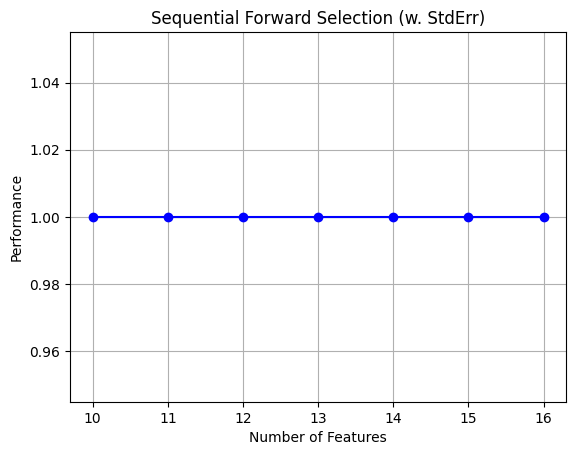

In [ ]:
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### **K-Nearest Neighbors**

In [ ]:
knn_backward_selection = pd.DataFrame(index=range(10, 17), columns=['F1-Score', 'AUC-ROC Score', 'Mean', 'Features'])

best_fold = scores_sort.loc['KNN', 'Best Fold Num']
X_best_fold = X_train.iloc[kfold_set['train'].loc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].loc[best_fold]]

for i in range(16, 9, -1):
  sbs = SFS(knn, k_features=i, forward=False, floating=False, cv=0)
  sbs.fit(X_best_fold, y_best_fold)

  X_train_sfs = sbs.transform(X_best_fold)
  X_test_sfs = sbs.transform(X_test)
  knn.fit(X_train_sfs, y_best_fold)
  y_pred = knn.predict(X_test_sfs)

  f1 = f1_score(y_test, y_pred)
  auc_roc = roc_auc_score(y_test, y_pred)
  mean = (f1 + auc_roc) / 2
  features = str(sbs.k_feature_names_)
  knn_backward_selection.loc[i] = [f1, auc_roc, mean, features]

  print(f"F1-score dengan {i} feature: {f1}")

SyntaxError: ignored

In [ ]:
knn_backward_selection

,F1-Score,AUC-ROC Score,Mean,Features
10,0.938185,0.934774,0.93648,"('marital', 'education', 'default', 'balance',..."
11,0.937514,0.934037,0.935775,"('marital', 'education', 'default', 'balance',..."
12,0.937211,0.933714,0.935462,"('marital', 'education', 'default', 'balance',..."
13,0.938426,0.935051,0.936738,"('marital', 'education', 'default', 'balance',..."
14,0.937001,0.933483,0.935242,"('marital', 'education', 'default', 'balance',..."
15,0.932515,0.928505,0.93051,"('age', 'marital', 'education', 'default', 'ba..."
16,0.92526,0.920116,0.922688,"('age', 'job', 'marital', 'education', 'defaul..."


### **Naive Bayes**

In [ ]:
nbc_backward_selection = pd.DataFrame(index=range(10, 17), columns=['F1-Score', 'AUC-ROC Score', 'Mean', 'Features'])

best_fold = scores_sort.loc['Naive Bayes', 'Best Fold Num']
X_best_fold = X_train.iloc[kfold_set['train'].loc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].loc[best_fold]]

for i in range(15, 9, -1):
  sbs = SFS(nbc, k_features=i, forward=False, floating=False, cv=0, scoring='f1')
  sbs.fit(X_best_fold, y_best_fold)

  X_train_sfs = sbs.transform(X_best_fold)
  X_test_sfs = sbs.transform(X_test)
  nbc.fit(X_train_sfs, y_best_fold)
  y_pred = nbc.predict(X_test_sfs)

  f1 = f1_score(y_test, y_pred)
  auc_roc = roc_auc_score(y_test, y_pred)
  mean = (f1 + auc_roc) / 2
  features = str(sbs.k_feature_names_)
  nbc_backward_selection.loc[i] = [f1, auc_roc, mean, features]

  print(f"F1-score dengan {i} feature: {f1}")

F1-score dengan 15 feature: 0.7591664149803685
F1-score dengan 14 feature: 0.7621118762836777
F1-score dengan 13 feature: 0.7585561997381709
F1-score dengan 12 feature: 0.767315078676744
F1-score dengan 11 feature: 0.7662224436417985
F1-score dengan 10 feature: 0.7642498294362091


In [ ]:
nbc_backward_selection

,F1-Score,AUC-ROC Score,Mean,Features
10,0.76425,0.752184,0.758217,"('age', 'marital', 'default', 'housing', 'loan..."
11,0.766222,0.755248,0.760735,"('age', 'marital', 'default', 'housing', 'loan..."
12,0.767315,0.755118,0.761217,"('age', 'marital', 'education', 'default', 'ho..."
13,0.758556,0.74749,0.753023,"('age', 'marital', 'education', 'default', 'ba..."
14,0.762112,0.743252,0.752682,"('age', 'marital', 'education', 'default', 'ba..."
15,0.759166,0.740057,0.749612,"('age', 'job', 'marital', 'education', 'defaul..."
16,NaN,NaN,NaN,NaN


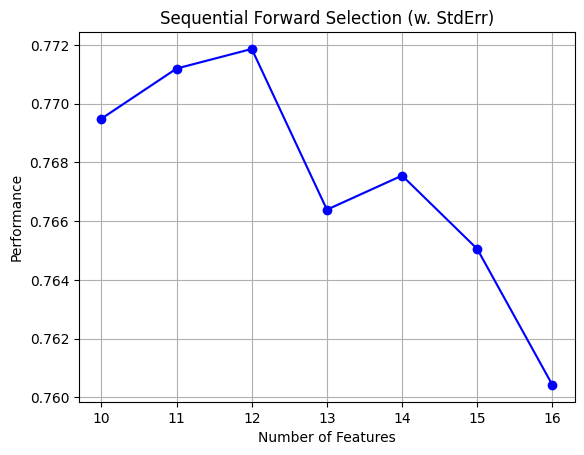

In [ ]:
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### **Support Vector Machine**

In [ ]:
svm_backward_selection = pd.DataFrame(index=range(10, 17), columns=['F1-Score', 'AUC-ROC Score', 'Mean', 'Features'])

best_fold = scores_sort.loc['SVM', 'Best Fold Num']
X_best_fold = X_train.iloc[kfold_set['train'].loc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].loc[best_fold]]

for i in range(15, 9, -1):
  sbs = SFS(svm, k_features=i, forward=False, floating=False, cv=0, scoring='f1')
  sbs.fit(X_best_fold, y_best_fold)

  X_train_sfs = sbs.transform(X_best_fold)
  X_test_sfs = sbs.transform(X_test)
  svm.fit(X_train_sfs, y_best_fold)
  y_pred = svm.predict(X_test_sfs)

  f1 = f1_score(y_test, y_pred)
  auc_roc = roc_auc_score(y_test, y_pred)
  mean = (f1 + auc_roc) / 2
  features = str(sbs.k_feature_names_)
  svm_backward_selection.loc[i] = [f1, auc_roc, mean, features]

  print(f"F1-score dengan {i} feature: {f1}")

F1-score dengan 15 feature: 0.7694830753083179
F1-score dengan 14 feature: 0.7696850393700786
F1-score dengan 13 feature: 0.7691701680672268
F1-score dengan 12 feature: 0.769149706909043
F1-score dengan 11 feature: 0.7706289101086597
F1-score dengan 10 feature: 0.7681159420289855


In [ ]:
svm_backward_selection

,F1-Score,AUC-ROC Score,Mean,Features
10,0.768116,0.770505,0.76931,"('marital', 'education', 'housing', 'loan', 'd..."
11,0.770629,0.772917,0.771773,"('marital', 'education', 'balance', 'housing',..."
12,0.76915,0.771483,0.770316,"('age', 'marital', 'education', 'balance', 'ho..."
13,0.76917,0.770765,0.769968,"('age', 'marital', 'education', 'balance', 'ho..."
14,0.769685,0.771157,0.770421,"('age', 'job', 'marital', 'education', 'balanc..."
15,0.769483,0.770896,0.770189,"('age', 'job', 'marital', 'education', 'balanc..."
16,NaN,NaN,NaN,NaN


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


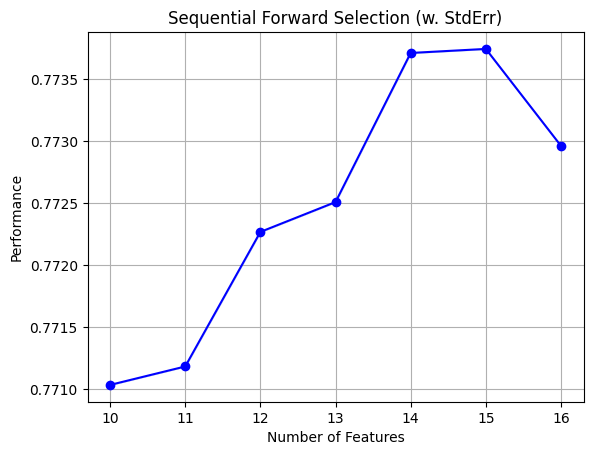

In [ ]:
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### **Neural Network**

In [ ]:
nn_backward_selection = pd.DataFrame(index=range(10, 17), columns=['F1-Score', 'AUC-ROC Score', 'Mean', 'Features'])

best_fold = scores_sort.loc['Neural Networks', 'Best Fold Num']
X_best_fold = X_train.iloc[kfold_set['train'].loc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].loc[best_fold]]

for i in range(16, 9, -1):
  sbs = SFS(nn, k_features=i, forward=False, floating=False, cv=0)
  sbs.fit(X_best_fold, y_best_fold)

  X_train_sfs = sbs.transform(X_best_fold)
  X_test_sfs = sbs.transform(X_test)
  nn.fit(X_train_sfs, y_best_fold)
  y_pred = nn.predict(X_test_sfs)

  f1 = f1_score(y_test, y_pred)
  auc_roc = roc_auc_score(y_test, y_pred)
  mean = (f1 + auc_roc) / 2
  features = str(sbs.k_feature_names_)
  nn_backward_selection.loc[i] = [f1, auc_roc, mean, features]

  print(f"F1-score dengan {i} feature: {f1}")

F1-score dengan 16 feature: 0.8531958003315528
F1-score dengan 15 feature: 0.8618166946880538
F1-score dengan 14 feature: 0.8612397177147479


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multil

In [ ]:
nn_backward_selection

### **Logistic Regression**

In [ ]:
logreg_backward_selection = pd.DataFrame(index=range(10, 17), columns=['F1-Score', 'AUC-ROC Score', 'Mean', 'Features'])

best_fold = scores_sort.loc['Logistic Regression', 'Best Fold Num']
X_best_fold = X_train.iloc[kfold_set['train'].loc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].loc[best_fold]]

for i in range(16, 9, -1):
  logreg = LogisticRegression(max_iter=500)
  sbs = SFS(logreg, k_features=i, forward=False, floating=False, cv=0, scoring='f1')
  sbs.fit(X_best_fold, y_best_fold)

  X_train_sfs = sbs.transform(X_best_fold)
  X_test_sfs = sbs.transform(X_test)
  logreg.fit(X_train_sfs, y_best_fold)
  y_pred = logreg.predict(X_test_sfs)

  f1 = f1_score(y_test, y_pred)
  auc_roc = roc_auc_score(y_test, y_pred)
  mean = (f1 + auc_roc) / 2
  features = str(sbs.k_feature_names_)
  logreg_backward_selection.loc[i] = [f1, auc_roc, mean, features]

  print(f"F1-score dengan {i} feature: {f1}")

F1-score dengan 16 feature: 0.7712623390207229
F1-score dengan 15 feature: 0.7721750489875898
F1-score dengan 14 feature: 0.7714509599059685
F1-score dengan 13 feature: 0.7709789068112061
F1-score dengan 12 feature: 0.7714808043875686
F1-score dengan 11 feature: 0.771199164436321
F1-score dengan 10 feature: 0.7685469638538467


In [ ]:
logreg_backward_selection

,F1-Score,AUC-ROC Score,Mean,Features
10,0.768547,0.769135,0.768841,"('education', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'previous', 'poutcome')"
11,0.771199,0.771483,0.771341,"('education', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')"
12,0.771481,0.771809,0.771645,"('education', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')"
13,0.770979,0.771352,0.771166,"('education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')"
14,0.771451,0.771809,0.77163,"('age', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')"
15,0.772175,0.772591,0.772383,"('age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')"
16,0.771262,0.771874,0.771568,"('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')"


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


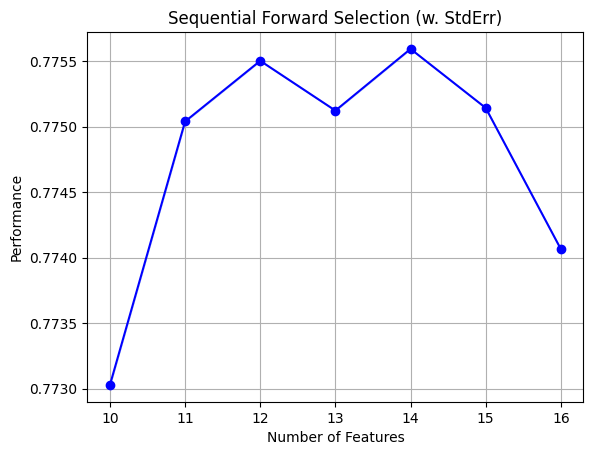

In [ ]:
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### **Random Forest**

In [ ]:
rf_backward_selection = pd.DataFrame(index=range(10, 17), columns=['F1-Score', 'AUC-ROC Score', 'Mean', 'Features'])

best_fold = scores_sort.loc['Random Forest', 'Best Fold Num']
X_best_fold = X_train.iloc[kfold_set['train'].loc[best_fold]]
y_best_fold = y_train.iloc[kfold_set['train'].loc[best_fold]]

for i in range(16, 9, -1):
  sbs = SFS(rf, k_features=i, forward=False, floating=False, cv=0)
  sbs.fit(X_best_fold, y_best_fold)

  X_train_sfs = sbs.transform(X_best_fold)
  X_test_sfs = sbs.transform(X_test)
  rf.fit(X_train_sfs, y_best_fold)
  y_pred = rf.predict(X_test_sfs)

  f1 = f1_score(y_test, y_pred)
  auc_roc = roc_auc_score(y_test, y_pred)
  mean = (f1 + auc_roc) / 2
  features = str(sbs.k_feature_names_)
  rf_backward_selection.loc[i] = [f1, auc_roc, mean, features]

  print(f"F1-score dengan {i} feature: {f1}")

In [ ]:
rf_backward_selection